# **ANALYSIS OF AIRBNB LISTINGS IN BANGKOK (2012-2022)**
As part of the capstone project at Purwadhika BSD, I was tasked with assessing my data analysis skills by analyzing Airbnb listing data for the period 2012-2022.

My first step was to understand the dataset to:

1. Identify stakeholders to whom I will present my analysis.
2. Identify the issues these stakeholders face.
3. Formulate preliminary hypotheses that might address these issues.
4. Provide evidence as to whether these hypotheses are supported by the data.

The explanations for the Airbnb dataset are as follows:

- id = Unique identifier for the listing on Airbnb.
- name = Name of the listing.
- host_id = Unique identifier for the host/user on Airbnb.
- host_name = The neighborhood is geocoded using latitude and longitude against neighborhoods defined by open or public digital shapefiles.
- Latitude = Latitude coordinate using the World Geodetic System (WGS84) projection.
- Longitude = Longitude coordinate using the World Geodetic System (WGS84) projection.
- Room_type = Type of room: Entire home/apt, Private room, Shared room, Hotel.
- Price = Daily price in local currency. Note: The $ sign may be used despite the locale.
- minimum_nights = The minimum number of nights required for the listing (calendar rules may differ).
- number_of_reviews = The number of reviews the listing has.
- reviews_per_month = The average number of reviews per month the listing has over the lifetime of the listing
- last_review = The date of the last/newest review.
- calculated_host_listings_count = The number of listings the host has in the current scrape in the city/region geography.
- availability_365 = Availability_x. The calendar determines the availability of the listing x days in the future. Note: A listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm = The number of reviews the listing has (in the last 12 months).

After conducting basic analyses to understand the data, here is the context I developed.

**Objective of Analysis**

The objective of this analysis is to provide insights to listing owners, known as hosts, both those who are already operational and those considering starting operations. This is because I aim to provide reviews to hosts to improve the two most important aspects: sales and profits.

**Problem Statement & Provisional Hypotheses**

When discussing sales and profits, it is closely related to traffic and determining the optimal price. Therefore, I formulated several problems to be developed into questions to assist in data exploration.

A. Sales Improvement -> Traffic

   What makes customers choose a particular listing over others?
   In exploring this analysis, I use the key metric in the availability 365 column. This is because the lower the availability value, the more bookings a listing has, and vice versa.


B. Optimal Profit -> Price

   What is the optimal price that hosts can set, attracting interest while still generating profits?
   In exploring this analysis, I use the key metric of price. This is because the higher the price, the fewer customers want to book, and vice versa.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## **1. DATA UNDERSTANDING & PREPROCESSING**

In [2]:
df= pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

This Airbnb dataset consists of 15,854 rows,17 columns, and have missing values 

In [4]:
print(df['neighbourhood'].unique())

['Ratchathewi' 'Bang Na' 'Bang Kapi' 'Din Daeng' 'Bang Kho laen'
 'Rat Burana' 'Chatu Chak' 'Khlong San' 'Bang Rak' 'Phaya Thai' 'Sathon'
 'Khlong Toei' 'Vadhana' 'Sai Mai' 'Lat Krabang' 'Bangkok Yai'
 'Wang Thong Lang' 'Huai Khwang' 'Phasi Charoen' 'Bang Sue' 'Nong Chok'
 'Phra Khanong' 'Thawi Watthana' 'Parthum Wan' 'Pra Wet' 'Phra Nakhon'
 'Thon buri' 'Yan na wa' 'Suanluang' 'Don Mueang' 'Dusit' 'Lak Si'
 'Samphanthawong' 'Bueng Kum' 'Bang Phlat' 'Saphan Sung' 'Min Buri'
 'Khan Na Yao' 'Khlong Sam Wa' 'Bang Khen' 'Lat Phrao' 'Chom Thong'
 'Bangkok Noi' 'Pom Prap Sattru Phai' 'Nong Khaem' 'Thung khru'
 'Bang Khae' 'Bang Khun thain' 'Taling Chan' 'Bang Bon']


In [5]:
df.describe()

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

In [6]:
df[df['price']==df['price'].min()]

Unnamed: 0        id                           name    host_id  \
11103       11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

From the description results, I found that the lowest value in the price column is 0, which is not possible. Therefore, I proceeded to remove this data.

In [7]:
# Delete row that price is zero 
df.drop(index=11103,inplace= True)

### **1.1 Find duplicates**
There are no duplicate data entries.

In [8]:
df.duplicated().sum()

0

### **1.2 Drop unnecessary column**

In [9]:
df.drop(columns=['Unnamed: 0','id','host_id'],inplace=True)


I dropped this column because it has no relation to the dataset. Additionally, there is no mention of this column in Airbnb's documentation.

### **1.3 Missing Values**

In [10]:
df.isna().sum()

name                                 8
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


From the results above, there are 4 columns with missing values:
1. Name
2. Host_name
3. Last_review
4. Reviews_per_month

Initially, I examined the columns with missing values in the dataset. Most of them couldn't be tracked to provide clues on how to fill the missing values. However, for the 'Name' column, I found one data entry that gave me an opportunity to make a better guess. This entry belonged to a listing where the host's name is Pakaphol.

I identified this by examining the 'calculated_host_listings_count' column, which indicated that this host had other listings in different locations. Upon further investigation, I discovered another data entry with the same host name, and both listings had the same name: Errday Guest House.

Therefore, for the 'Name' column corresponding to listings belonging to Pakaphol, I filled the missing values with 'Errday Guest House'.

In [11]:
df[df['host_name']=='Pakaphol']

name host_name neighbourhood  latitude  longitude  \
1981  Errday Guest House  Pakaphol   Khlong Toei  13.72427  100.56443   
1982  Errday Guest House  Pakaphol   Khlong Toei  13.72373  100.56415   
2075                 NaN  Pakaphol   Khlong Toei  13.72566  100.56416   

         room_type  price  minimum_nights  number_of_reviews last_review  \
1981  Private room    950               1                  1  2020-02-19   
1982  Private room  36363               1                  0         NaN   
2075  Private room    850               1                  2  2017-12-11   

      reviews_per_month  calculated_host_listings_count  availability_365  \
1981               0.03                               3                 1   
1982                NaN                               3                 1   
2075               0.03                               3               220   

      number_of_reviews_ltm  
1981                      0  
1982                      0  
2075                      0

In [12]:
df.loc[2075,'name'] = 'Errday Guest House'
df.loc[2075,'name']

'Errday Guest House'

For the other data, I filled in the missing values as mentioned below. 

In [13]:
df.fillna({'name':'Noname'},inplace=True)
df.fillna({'host_name':'NoName'},inplace=True)
df.fillna({'reviews_per_month':0},inplace=True)

The reason I fill 'name' and 'host_name' as 'NoName' is because I've already checked for duplicates, and found none. Therefore, the null values in 'name' and 'host_name' still represent unique listings. As for 'reviews_per_month', I simply fill it with 0, indicating no reviews. Additionally, I noticed that the missing values in 'reviews_per_month' correspond to the same number as 'last_review', suggesting that the host indeed has yet to receive any reviews.

In [14]:
df.isna().sum()

name                                 0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

To fill the missing values in the "last_review" column, I examined the data and noticed that some entries have a "calculated_host_listings_count" greater than 1. This indicates multiple listings for certain hosts. Assuming that each listing can potentially affect the host, I decided to group the data first to identify if any hosts have listings beyond the current one.

In [15]:
host_last_review = {}

for index, row in df.iterrows():
    if not pd.isnull(row['last_review']):
        host_last_review[row['host_name']] = row['last_review']

print(host_last_review)

{'Nuttee': '2020-01-03', 'Sirilak': '2019-02-02', 'Wimonpak': '2019-05-09', 'Athitaya': '2014-02-03', 'Nol': '2016-03-29', 'Somsak': '2022-11-05', 'Tor': '2022-12-22', 'Jing': '2022-09-30', 'Mimi': '2022-12-16', 'Piyakorn': '2019-05-31', 'Sue': '2022-12-24', 'Henry': '2019-12-27', 'Timo': '2020-04-06', 'Chuchart': '2018-12-24', 'Shine': '2018-09-12', 'Dustin': '2013-10-09', 'Sudhichai': '2018-04-05', 'Parinya': '2022-11-25', 'วสวัตติ์': '2019-09-07', 'Gael': '2022-11-30', 'Gerd': '2022-11-26', 'Nattavut': '2018-08-30', 'Apiradee': '2020-03-21', 'Danny': '2022-09-16', 'Weera': '2022-07-22', 'Jirasak': '2018-12-18', 'Evan': '2022-12-15', 'Rae And Charlie': '2019-08-14', 'Evan From Sanctuary House': '2022-12-14', 'Salvatore': '2022-09-09', 'Pichanee': '2018-07-02', 'Phoebe': '2020-02-20', 'Bee': '2022-11-26', 'Marvin': '2017-02-23', 'Primrose': '2022-10-25', 'Luckana': '2020-02-28', 'Mitch & Mam': '2019-08-04', 'Pariya': '2022-09-23', 'Nicky': '2020-02-02', 'Anshera': '2022-09-20', 'Piya'

First, I extracted the data of hosts and their respective "last_review" values. 

In [16]:
df_host_last_review = pd.DataFrame(list(host_last_review.items()), columns=['host_name', 'last_review'])

print(df_host_last_review)

      host_name last_review
0        Nuttee  2020-01-03
1       Sirilak  2019-02-02
2      Wimonpak  2019-05-09
3      Athitaya  2014-02-03
4           Nol  2016-03-29
...         ...         ...
3258      Patch  2022-12-20
3259     Suyada  2022-12-18
3260        Non  2022-12-23
3261      Lucky  2022-12-23
3262  Phatchara  2022-12-26

[3263 rows x 2 columns]


After that, I grouped the data by host and selected the maximum value to obtain the most recent review for each host.

In [17]:
df_host_last_review.groupby('host_name')[['last_review']].max()

last_review
host_name                       
.● Bm                 2022-12-11
1905 Heritage Corner  2019-04-14
1989 Ratchada         2020-01-31
A                     2022-12-20
A Hui 辉泰郎 ปริพล       2020-02-21
...                          ...
雷                     2022-11-11
주은                    2022-12-26
형근                    2022-11-08
ｼﾞｬｯｷｰ                2020-02-17
ﾀｯ                    2022-12-18

[3263 rows x 1 columns]

In [18]:
for index, row in df[df['last_review'].isna()].iterrows():
    if row['host_name'] in df_host_last_review['host_name'].values:
        host_last_review = df_host_last_review[df_host_last_review['host_name'] == row['host_name']]
        df.at[index, 'last_review'] = host_last_review['last_review'].values[0]

# Check if there are still missing values in 'last_review'
print("Number of missing values in 'last_review' after filling:", df['last_review'].isna().sum())


Number of missing values in 'last_review' after filling: 2681


And then, I compared the missing values to see if they have a similar host_name. If they do, the value in "df_host_last_review" will be used to fill the missing data. After completing this process, the number of missing values in "last_review" is reduced to 2681.

In [19]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [20]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  15853.000000  15853.000000  1.585300e+04    15853.000000   
mean      13.745144    100.559903  3.217907e+03       15.293257   
min       13.527300    100.329550  2.780000e+02        1.000000   
25%       13.720090    100.529690  9.000000e+02        1.000000   
50%       13.738490    100.561410  1.429000e+03        1.000000   
75%       13.759500    100.585150  2.429000e+03        7.000000   
max       13.953540    100.923440  1.100000e+06     1125.000000   
std        0.043041      0.050912  2.497290e+04       50.816496   

       number_of_reviews                    last_review  reviews_per_month  \
count       15853.000000                          13172       15853.000000   
mean           16.655207  2021-09-02 03:11:12.335256832           0.516211   
min             0.000000            2012-12-15 00:00:00           0.000000   
25%             0.000000            2020-02-15 18:00:00           0.000000   
50%             2.000000            2022-10-21 00:00:00           0.090000   
75%            13.000000            2022-12-08 00:00:00           0.670000   
max          1224.000000            2022-12-28 00:00:00          19.130000   
std            40.614397                            NaN           0.952774   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15853.000000      15853.000000           15853.000000  
mean                        13.890431        244.394058               3.481738  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000  
std                         30.270630        125.832224               8.917176

And for the rest of missing values, i decided to use median value. 

In [21]:

fill_date = pd.to_datetime('2022-10-21')

# Fill missing values in 'last_review' with the specified datetime value
df.loc[(df['last_review'].isna()), 'last_review'] = '2022-10-21'


In [22]:
df.isna().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [23]:
df.shape

(15853, 14)

### **1.4 Define & delete outlier**


In [24]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  15853.000000  15853.000000  1.585300e+04    15853.000000   
mean      13.745144    100.559903  3.217907e+03       15.293257   
min       13.527300    100.329550  2.780000e+02        1.000000   
25%       13.720090    100.529690  9.000000e+02        1.000000   
50%       13.738490    100.561410  1.429000e+03        1.000000   
75%       13.759500    100.585150  2.429000e+03        7.000000   
max       13.953540    100.923440  1.100000e+06     1125.000000   
std        0.043041      0.050912  2.497290e+04       50.816496   

       number_of_reviews                    last_review  reviews_per_month  \
count       15853.000000                          15853       15853.000000   
mean           16.655207  2021-11-11 02:59:12.993124352           0.516211   
min             0.000000            2012-12-15 00:00:00           0.000000   
25%             0.000000            2020-04-19 00:00:00           0.000000   
50%             2.000000            2022-10-21 00:00:00           0.090000   
75%            13.000000            2022-12-03 00:00:00           0.670000   
max          1224.000000            2022-12-28 00:00:00          19.130000   
std            40.614397                            NaN           0.952774   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15853.000000      15853.000000           15853.000000  
mean                        13.890431        244.394058               3.481738  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000  
std                         30.270630        125.832224               8.917176

In [25]:
df['calculated_host_listings_count'].unique()

array([  2,   1,   3,  41,  10,   7,   6,   4,  37,   8,  19,   5,  53,
        45,  13,  11,  25,  24,  36,  29,  18,  12,   9,  15,  44,  33,
        39,  21,  34,  89,  32,  56,  62,  23,  14,  22,  17,  28,  16,
        31,  20,  26, 228,  48,  99,  27,  30,  49,  40,  35], dtype=int64)

In [26]:
df[df['calculated_host_listings_count'] == 228]

name host_name  \
6473     Near The Grand Palace/ASOK Station/Sukhumvit#05     Curry   
6479   Near The Grand Palace/ASOK Station/Sukhumvit 5...     Curry   
6672     Near The Grand Palace/ASOK Station/Sukhumvit#06     Curry   
7009          New! Sukhumvit NANA 1BR Suit near BTS 2PPL     Curry   
7244   30days!  Sukhumvit NANA spacious 1BR 2PPL near...     Curry   
...                                                  ...       ...   
14906        New!Near The Grand Palace/ASOK Station/4PPL     Curry   
15336  30days! AirportLink Sukhumvit NANA MaxValu 2BR...     Curry   
15474  月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池...     Curry   
15515  One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...     Curry   
15783     5days!New!Bang Phlat MRT 600m/swiming pool/gym     Curry   

      neighbourhood   latitude   longitude        room_type  price  \
6473    Khlong Toei  13.735100  100.559190  Entire home/apt   2057   
6479    Khlong Toei  13.733850  100.557140  Entire home/apt   2057   
6672    Khlong Toei  13.733950  100.558800  Entire home/apt   2057   
7009    Ratchathewi  13.750870  100.555970  Entire home/apt   1466   
7244    Ratchathewi  13.749710  100.556570  Entire home/apt   1466   
...             ...        ...         ...              ...    ...   
14906   Khlong Toei  13.735637  100.557799  Entire home/apt   3429   
15336   Ratchathewi  13.750300  100.555503  Entire home/apt   3994   
15474   Khlong Toei  13.718087  100.580706  Entire home/apt   1588   
15515   Ratchathewi  13.756598  100.540777  Entire home/apt   2000   
15783    Bang Phlat  13.788938  100.503600  Entire home/apt   3822   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
6473                1                 60  2022-12-11               1.24   
6479                1                 76  2022-12-14               1.55   
6672                1                101  2022-12-14               2.10   
7009                3                 86  2022-11-08               1.87   
7244                3                 81  2022-11-04               1.78   
...               ...                ...         ...                ...   
14906               1                  3  2022-12-25               3.00   
15336               3                  0  2022-12-25               0.00   
15474              30                  0  2022-12-25               0.00   
15515              25                  0  2022-12-25               0.00   
15783               5                  0  2022-12-25               0.00   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
6473                              228               361                     18  
6479                              228               361                     19  
6672                              228               361                     20  
7009                              228               356                     14  
7244                              228               358                      7  
...                               ...               ...                    ...  
14906                             228               360                      3  
15336                             228               340                      0  
15474                             228               304                      0  
15515                             228               348                      0  
15783                             228               311                      0  

[228 rows x 14 columns]

Based on the table description, I'm focusing on columns with a notably wide range (maximum - minimum value):

1. The "Price" column exhibits a broad range, spanning from 278 to 1,100,000 baht.
2. Similarly, the "Minimum_nights" column shows a wide range, varying from 1 to 1125 nights.
3. Although the "Number of reviews" column also displays a wide range, I don't intend to alter any data within it. My primary focus is on analyzing popularity, and the maximum review count remains relevant. There's a possibility that listings with high review numbers are popular or that hosts manage multiple listings.
4. I don't plan to delve deeper into other review-related columns because they are correlated with the number of reviews. This conclusion is drawn from the initial feature explanation I provided.
5. While the "Calculated_host_listings_count" column also demonstrates a wide range, I'm not removing it. I'm interested in exploring whether there's a relationship between having numerous listings and popularity. Additionally, there's evidence: the host_name 'Curry' has a 'calculated_host_listings_count' value of 228. Upon verification, it confirms that Curry indeed has all of them.
6. Similarly, I won't exclude outliers from the "Availability_365" column and will utilize the original data as is.

To identify any outliers, I initially examined the histogram of the price. I selected this column because 'price' is highly likely to be influenced by other variables. 

<function matplotlib.pyplot.show(close=None, block=None)>

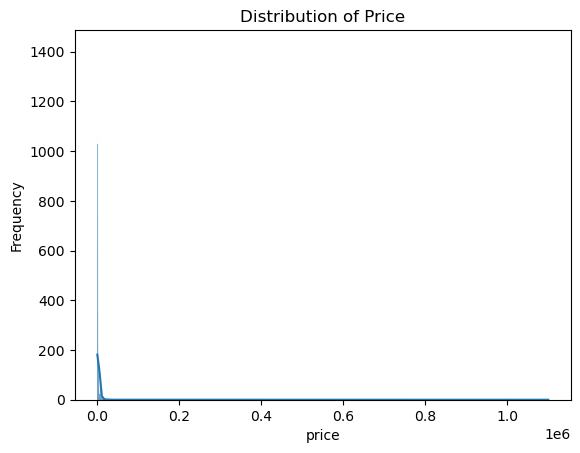

In [27]:

sns.histplot(data=df, x='price',kde=True);

plt.title('Distribution of Price')

plt.ylabel('Frequency')
plt.show

The distribution is not normal and is highly right-skewed. This skewness is attributed to the wide range of values.

<function matplotlib.pyplot.legend(*args, **kwargs)>

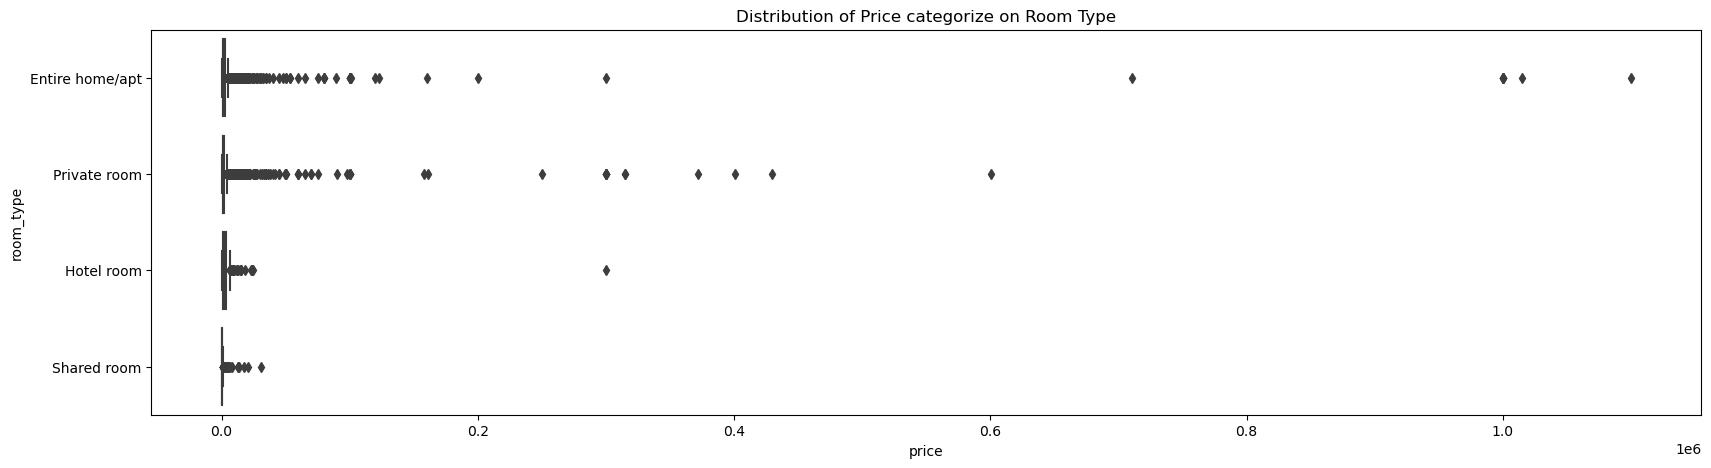

In [28]:
plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend

The graph above shows that the price distribution for each room_type is not normal. The highest outlier corresponds to hosts offering entire home/apartment.

That's why i dig deeper into price's outlier. 

In [29]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

# Identify listings above the upper bound
df_upperBound = df[df['price'] > (Q3 + 1.5 * IQR)]

# Print information about upper bound listings
print(f'Number of listings in upper bound: {len(df_upperBound)}')
print(f"Median price of data in upper bound: {df_upperBound['price'].median()}")
print(f"Number of data that exceed the median value: {len(df_upperBound[df_upperBound['price'] > df_upperBound['price'].median()])}")
print(f'''Proportion of outliers are {len(df_upperBound[df_upperBound['price'] > df_upperBound['price'].median()])/len(df)}''')


Number of listings in upper bound: 1403
Median price of data in upper bound: 7340.0
Number of data that exceed the median value: 701
Proportion of outliers are 0.04421875985617864


For this analysis, I would like to emphasize affordability, which is why I am using data that is more centrally distributed. Also, after I calculate, the proportion of outliers is only 4.42% of the overall data. Therefore, I will delete all data points with prices above 7340.

In [30]:
df_clean = df.drop(df[df['price'] > 7340].index)
len(df_clean)

15152

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\2451311764.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)


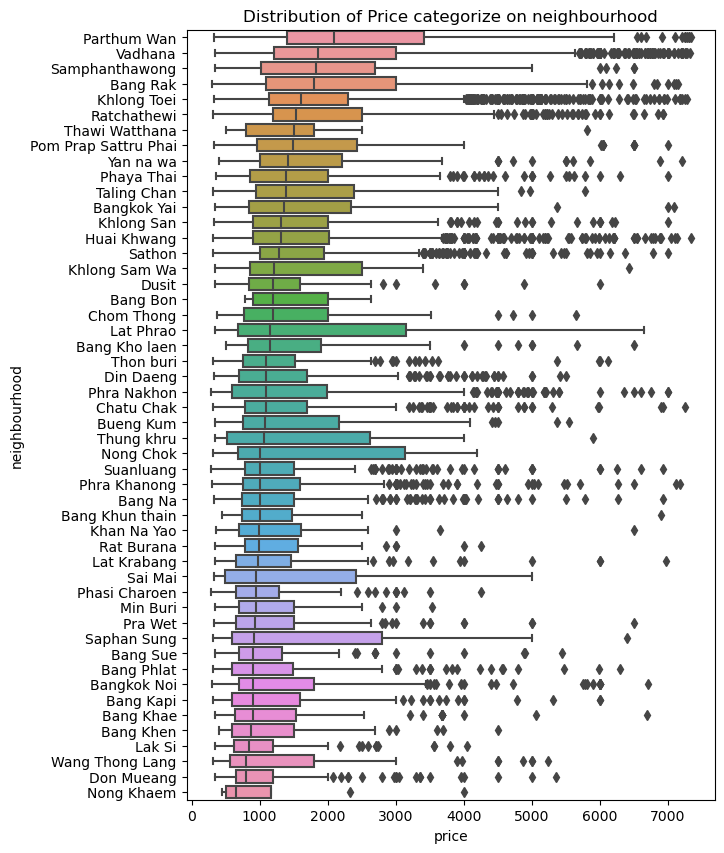

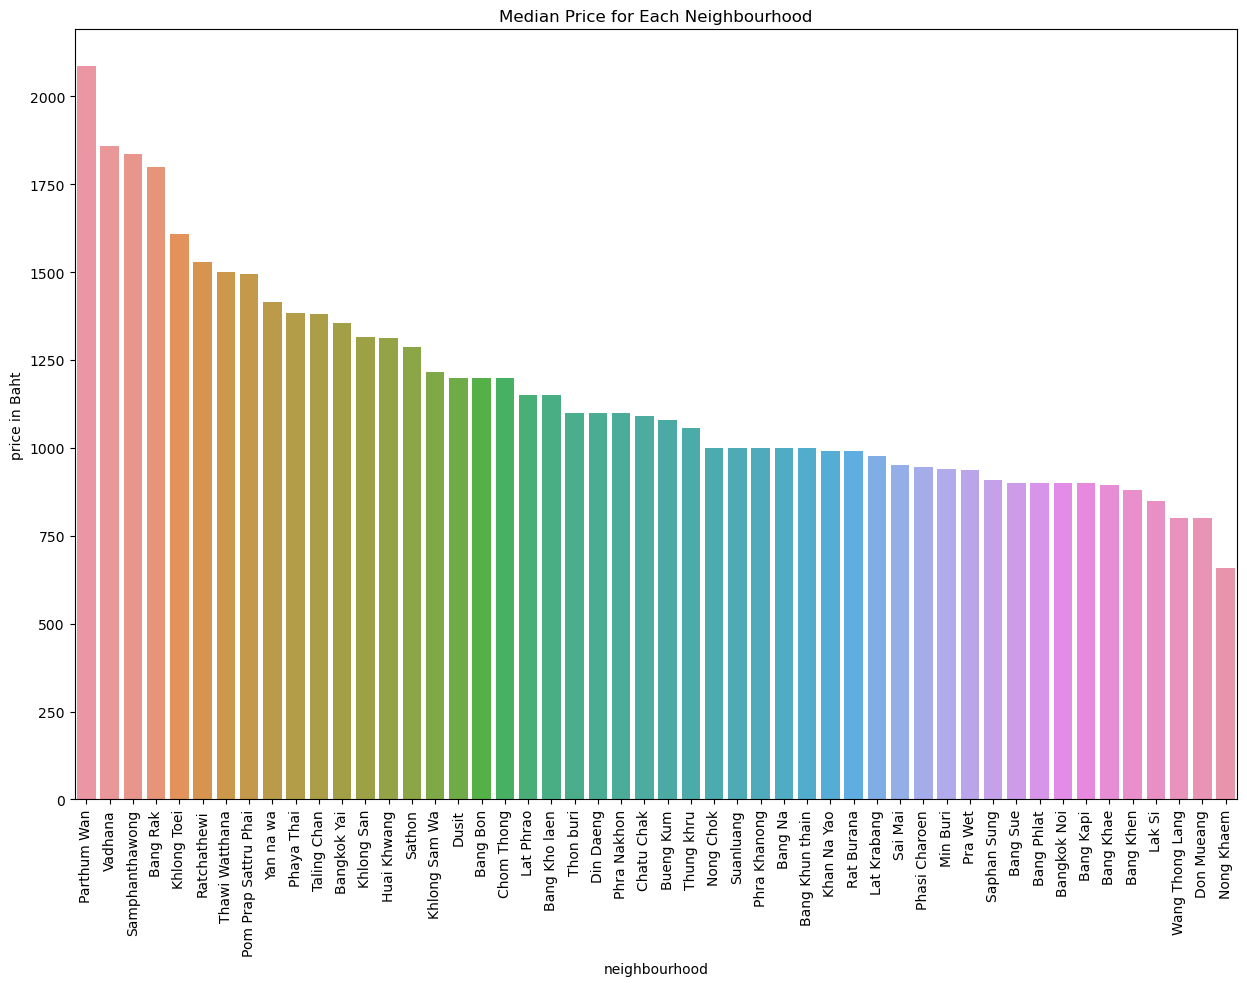

In [31]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
median_prices = df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create boxplot 
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'neighbourhood',
            order=median_prices.index
            )   

# Add title to the graph
plt.title('Distribution of Price categorize on neighbourhood')

# -------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 10))
sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Median Price for Each Neighbourhood')
plt.ylabel('price in Baht')
plt.show()


From the graph above, here are the insights we can gather:

BOXPLOT : <br>
- The top 5 neighborhoods with a significant number of outliers are Vadhana, Khlong Toei, Ratchathewi, Huai Khwang, and Sathon.
- Most neighborhoods exhibit a wide range of prices. My assumption is that this variation is largely due to the presence of four different room types, each of which affects the price of listings differently.
- The majority of neighborhoods fall within the price range of 350 - 3000 Baht.


BARPLOT : <br>
- The top 3 neighborhoods with the highest median price are Parthum Wan, Vadhana, Samphanthawong
- Conversely, the top 3 neighborhoods with the lowest median price are Nong Khaem, Don Mueang, and Wang Thong Lang 
- Mostly all the neighbourhoods has median price higher than 800 Baht

In [32]:
df_clean.shape

(15152, 14)

After that, I took a look at the 'minimum_nights' column, and I'm interested in identifying listings that only accept stays longer than 365 days. Typically, people choose Airbnb for shorter stays. https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp#:~:text=Airbnb%20is%20an%20online%20marketplace,cheaper%20and%20homier%20than%20hotels.

In [33]:
len(df_clean[df_clean['minimum_nights'] > 365].index)

11

And I found that there are only 11 listings with minimum nights exceeding 365. I've decided to drop these, as my primary focus is on stays ranging from 1 to 365 days.

In [34]:
df_clean = df_clean.drop(df_clean[df_clean['minimum_nights'] > 365].index)
len(df_clean)

15141

In [35]:
df_clean.to_excel('Airbnb_Clean_Data01.xlsx')

In [36]:
df_clean.to_csv('AirbnbCleanData01.csv')

## **2. EXPLORATORY DATA ANALYSIS**

### **2.1. ANALYSIS OF POPULARITY FOR BETTER SALES IMPROVEMENT**

If we are discussing sales, it won't be far removed from traffic and customer behavior.

Question:<br>
**What are the factors that influence customers to choose one listing over another?**

Our basic assumption is that customers choose based on location, price, and popularity.

For this analysis, I selected a key metric from the 'availability_365' column. This column indicates the availability of the listing, with lower numbers suggesting more bookings already made, and vice versa. I chose this column because on the website https://insideairbnb.com/bangkok, Airbnb provides visualizations of occupancy that closely align with the values in the 'availability_365' column. Additionally, I later utilized a dataframe with 'number_of_reviews_ltm' greater than 1 for comparison.

I also obtained additional data called 'review.csv'. This dataset compiles reviews from various visitors. I extracted this data to determine the most frequently mentioned words in their reviews, aiming to identify crucial keywords.

In [37]:
from collections import Counter
import re

# Read the CSV file into a DataFrame
df_reviews = pd.read_csv('reviews.csv')

# Convert all values in the 'review' column to strings
df_reviews['comments'] = df_reviews['comments'].astype(str)

# Concatenate all reviews into a single string
all_reviews_text = ' '.join(df_reviews['comments'])

# Tokenize the text by splitting it into words
words = re.findall(r'\b\w+\b', all_reviews_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get 100 most common words
most_common_words = word_counts.most_common(100)  

print("Most common keywords:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


Most common keywords:
the: 626074 occurrences
and: 516694 occurrences
to: 353155 occurrences
a: 313756 occurrences
is: 283295 occurrences
was: 213046 occurrences
br: 208676 occurrences
in: 197328 occurrences
very: 180731 occurrences
i: 151908 occurrences
place: 147028 occurrences
for: 143867 occurrences
it: 138926 occurrences
of: 125236 occurrences
great: 123432 occurrences
stay: 119340 occurrences
you: 112037 occurrences
we: 111589 occurrences
with: 99519 occurrences
s: 83813 occurrences
location: 80970 occurrences
clean: 80071 occurrences
good: 79273 occurrences
nice: 78069 occurrences
host: 73526 occurrences
this: 70917 occurrences
apartment: 66300 occurrences
there: 63464 occurrences
at: 62773 occurrences
but: 60359 occurrences
bangkok: 59898 occurrences
from: 57007 occurrences
room: 56769 occurrences
as: 56393 occurrences
are: 56296 occurrences
so: 53798 occurrences
that: 50157 occurrences
on: 49214 occurrences
had: 46913 occurrences
my: 45875 occurrences
all: 45383 occurrences
bt

In [38]:
len(df_reviews)

372461

I extracted the 100 most mentioned words and identified these crucial keywords:<br>
Location: close, station, walk, convenient, near <br>
Cleanliness: cleanliness, comfortable <br>
Host: helpful, friendly, responsive <br>


From these frequently mentioned keywords, it's evident that the primary reasons people choose a listing are based on location, the quality of the accommodation, and the performance of the host.

<Axes: xlabel='availability_365', ylabel='Count'>

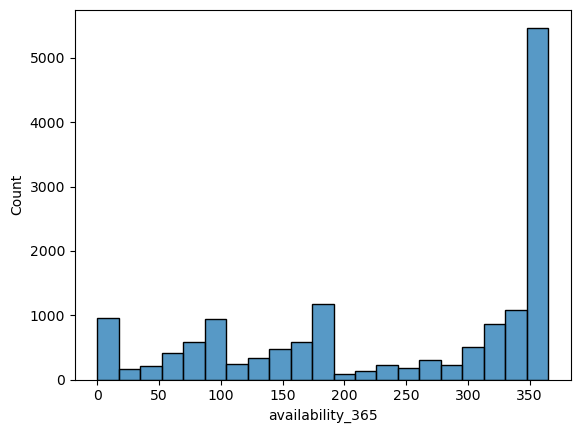

In [39]:
sns.histplot(data=df_clean,x='availability_365')

In [40]:
df_clean.groupby('availability_365')['name'].count()

availability_365
0       816
1        44
2        14
3         6
4        10
       ... 
361     288
362     282
363     269
364     639
365    2217
Name: name, Length: 366, dtype: int64

After that, I need to categorize the listings by dividing them into groups by column availability_365

In [41]:
# Make groups based on the number of availability 
def popularity(availability):
    if availability in range(0, 91):
        return 'Very Popular'
    elif availability in range(91, 181):
        return 'Popular'
    elif availability in range(181, 271):
        return 'Neutral'
    elif availability in range(271, 366):
        return 'Not Popular'

# Make additional column 
df_clean['popularity'] = df_clean['availability_365'].apply(popularity)


In [42]:
# Create dataFrame for each group 

avail_0_90 = []
avail_91_180 = []
avail_181_270 = []
avail_271_365 = []

for index, row in df_clean.iterrows():
    availability = row['availability_365']
    if availability in range(0, 91):
        avail_0_90.append(row) 
    elif availability in range(91, 181):
        avail_91_180.append(row)
    elif availability in range(181, 271):
        avail_181_270.append(row)
    elif availability in range(271, 366):
        avail_271_365.append(row)

avail_0_90_df = pd.DataFrame(avail_0_90)
avail_91_180_df = pd.DataFrame(avail_91_180)
avail_181_270_df = pd.DataFrame(avail_181_270)
avail_271_365_df = pd.DataFrame(avail_271_365)


group_lengths = {
    '0-90': len(avail_0_90_df),
    '91-180': len(avail_91_180_df),
    '181-270': len(avail_181_270_df),
    '271-365': len(avail_271_365_df)
}

group_lengths_df = pd.DataFrame(list(group_lengths.items()), columns=['Availability Group', 'Number of Listings'])

print(group_lengths_df)

  Availability Group  Number of Listings
0               0-90                3039
1             91-180                2901
2            181-270                 914
3            271-365                8287


In [43]:
df_popular = pd.concat([avail_0_90_df,avail_91_180_df,avail_181_270_df])
df_popular.head()

name host_name neighbourhood  \
9                       Standard Room Decor do Hostel    Somsak    Khlong San   
23                Contemporary Modern Duplex-Thong Lo     Shine   Khlong Toei   
38                 ICONSIAM River view  on 49th floor     Weera      Bang Rak   
50  Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok  Pichanee   Khlong Toei   
51                Chic two bedroom for Monthly rental    Phoebe      Bang Rak   

    latitude  longitude        room_type  price  minimum_nights  \
9   13.72040  100.50757     Private room    700               2   
23  13.72097  100.57823  Entire home/apt   2078              60   
38  13.72287  100.51678     Private room   2500             180   
50  13.73782  100.55179  Entire home/apt   1490               5   
51  13.72687  100.52725  Entire home/apt   2701              30   

    number_of_reviews last_review  reviews_per_month  \
9                   4  2019-12-27               0.03   
23                 83  2018-09-12               0.75   
38                 15  2015-12-08               0.14   
50                 11  2018-07-02               0.15   
51                104  2020-02-20               0.89   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
9                               10                87                      0   
23                               1                55                      0   
38                               1                88                      0   
50                               1                16                      0   
51                               1                 0                      0   

      popularity  
9   Very Popular  
23  Very Popular  
38  Very Popular  
50  Very Popular  
51  Very Popular

#### **2.1.1 Categorical vs Categorical Statistic Test** 

After separating the data into four groups based on their popularity, I would like to test if there is any association between each variable. Since there are numerous columns, I've divided them into categorical and numerical variables.

Categorical vs. Categorical Statistical Test:

1. Host Name
2. Neighbourhood
3. Room Type

In [44]:
from scipy.stats import chi2_contingency

# Hypothesis
# H0 = 'host_name' or 'neighbourhood' or 'room_type' dont have any relationship with popularity
# Ha = 'host_name' or 'neighbourhood' or 'room_type' have relationship with popularity

# Define hypothesis testing function
def hypothesis_test(feature):
    df_crosstab = pd.crosstab(df_clean['popularity'], df_clean[feature])
    stats, p_value, dof, _ = chi2_contingency(df_crosstab)
    if p_value > 0.05:
        return stats, p_value, "Accept H0"
    else:
        return stats, p_value, "Reject H0"

# Define features to test
features = ['host_name', 'neighbourhood', 'room_type']

# Perform hypothesis testing for each feature
results = []
for feature in features:
    stats, p_value, hypothesis_status = hypothesis_test(feature)
    results.append({'Feature': feature, 'Statistic': stats, 'P-value': p_value, 'Hypothesis': hypothesis_status})

# Sort results based on p-value
ranked_results = sorted(results, key=lambda x: x['P-value'])

# Print results
print("Ranked Features based on Chi-squared Test:")
for rank, result in enumerate(ranked_results, 1):
    print(f"{rank}. {result['Feature']}: Statistic = {result['Statistic']:.4f}, P-value = {result['P-value']:.4f}. {result['Hypothesis']} null hypothesis.")


Ranked Features based on Chi-squared Test:
1. host_name: Statistic = 26967.6269, P-value = 0.0000. Reject H0 null hypothesis.
2. room_type: Statistic = 482.3538, P-value = 0.0000. Reject H0 null hypothesis.
3. neighbourhood: Statistic = 638.1336, P-value = 0.0000. Reject H0 null hypothesis.


First of all, I used the chi-square test because it is the appropriate statistical test for both categorical variables. After running the test, we observed that all features rejected the null hypothesis. Therefore, we can conclude that host_name, neighbourhood, and room_type has relationship with popularity, thus could affect customer's decision. 


**Top 5 Host at Bangkok** 

In [45]:
df_clean.groupby('host_name')[['name']].count().sort_values(by='name',ascending=False).head(5)

name
host_name      
Curry       228
Noons        99
K            84
Pornchai     63
Dusadee      60

In [46]:
df_popular.groupby(by='host_name')[['name']].count().sort_values(by='name',ascending=False).head(5)

name
host_name      
Curry        62
Pornchai     60
Mike         53
Ludoping     50
Ken-Bambu    48

In [47]:
host_popular = ['Curry','Mike','Ludoping','Pornchai','Ken-Bambu']
df_clean[df_clean['host_name'].isin(host_popular)].groupby(by='host_name')['calculated_host_listings_count'].value_counts()

host_name  calculated_host_listings_count
Curry      228                               228
Ken-Bambu  48                                 48
Ludoping   56                                 54
Mike       49                                 49
           1                                   6
Pornchai   62                                 62
           1                                   1
Name: count, dtype: int64

I also ranked the hosts into the top 5 based on the group popularity that I created earlier to strengthen the validity of the statement. I combined three dataframes: one is avail_0_90_df,avail_91_181_df, avail_181_271_df and we obtained the top 5 hosts.

Later, I investigated the relationship between the top hosts and the column of calculated_listings_count and found that all of the famous hosts have more than 10 listings. This suggests that they may be professionally managed, thereby increasing the reliability of the listings. It is also possible that Airbnb boosts their algorithm based on the reputation of hosts, which is gained from various listings.

**Room Type**

In [48]:
df_clean.groupby(by='room_type')[['name']].count().sort_values(by='name',ascending=False)

name
room_type            
Entire home/apt  8520
Private room     5490
Hotel room        615
Shared room       516

In [49]:
df_popular.groupby(by='room_type')[['name']].count().sort_values(by='name',ascending=False)

name
room_type            
Entire home/apt  4485
Private room     1975
Shared room       203
Hotel room        191

In terms of room_type, our customers prefer entire home/apt, as it enables them to enjoy the overall space. This is followed by private room, hotel room, and shared room.

**Neighbourhood Analysis**

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\275706381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['last_review'].dt.year
C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\275706381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['last_review'].dt.month


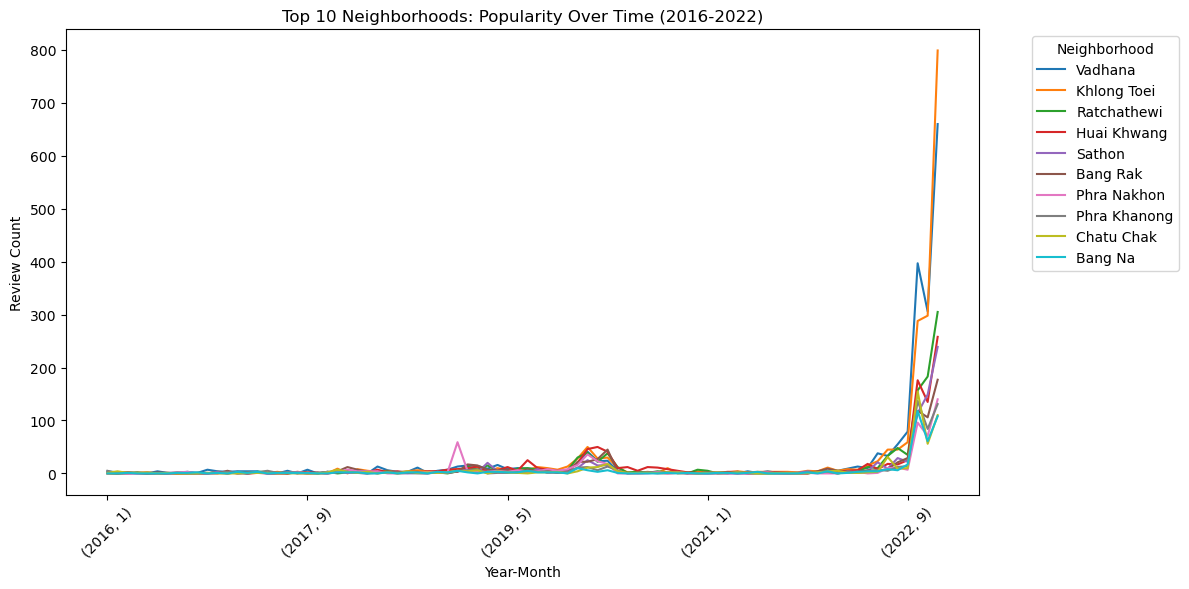

In [50]:
# Convert 'last_review' column to datetime type
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

# Filter data for the years 2016-2022
df_filtered = df_clean[(df_clean['last_review'].dt.year >= 2016) & (df_clean['last_review'].dt.year <= 2022)]

# Extract year and month from 'last_review' column
df_filtered['year'] = df_filtered['last_review'].dt.year
df_filtered['month'] = df_filtered['last_review'].dt.month

# Group by neighbourhood, year, and month and count the number of reviews
grouped = df_filtered.groupby(['neighbourhood', 'year', 'month']).size().reset_index(name='review_count')

# Get the top 10 neighbourhoods by review count
top_10_neighbourhoods = grouped.groupby('neighbourhood')['review_count'].sum().nlargest(10).index

# Filter data for the top 10 neighbourhoods
grouped_top_10 = grouped[grouped['neighbourhood'].isin(top_10_neighbourhoods)]

# Calculate total number of reviews for each neighbourhood
neighbourhood_review_totals = grouped_top_10.groupby('neighbourhood')['review_count'].sum()

# Sort the columns of the pivot table based on total review counts
pivot_table = grouped_top_10.pivot_table(index=['year', 'month'], columns='neighbourhood', values='review_count', fill_value=0)
pivot_table = pivot_table[neighbourhood_review_totals.sort_values(ascending=False).index]

# Plot the trend for each neighbourhood
pivot_table.plot(figsize=(12, 6), xlabel='Year-Month', ylabel='Review Count', title='Top 10 Neighborhoods: Popularity Over Time (2016-2022)')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The trend graph above indicates that traffic to Bangkok surged significantly after the Covid-19 pandemic. The top five neighborhoods exhibiting the highest exponential growth are Khlong Tei, Vadhana, Ratchathewi, Huai Khwang, and Sathon

In [51]:
df_popular.groupby(by='neighbourhood')[['name']].count().sort_values(by='name',ascending=False).head(10)

name
neighbourhood      
Vadhana        1036
Khlong Toei     993
Huai Khwang     626
Ratchathewi     443
Sathon          323
Bang Rak        313
Phra Khanong    268
Chatu Chak      229
Din Daeng       196
Bang Na         194

From this categorical vs. categorical test, we can conclude that neighborhood, host, and room type have an impact on popularity. The top 10 neighborhoods are mentioned in the pivot table above. Additionally, hosts with multiple listings are more likely to increase traffic due to increased visibility and reliability. Moreover, our customers tend to prefer booking entire apartments for their stay.

**Folium**

In [52]:
df_numberofListings = df_clean.groupby('neighbourhood')[['name']].count().reset_index()
df_numberofListings.head()

neighbourhood  name
0       Bang Bon     5
1      Bang Kapi   254
2      Bang Khae    88
3      Bang Khen   113
4  Bang Kho laen   129

In [53]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Bangkok
bangkok_map = folium.Map(location=[13.736717, 100.523186], zoom_start=11)

# Initialize a MarkerCluster object
marker_cluster = MarkerCluster().add_to(bangkok_map)

# Add markers for each Airbnb listing
for idx, row in df_clean.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Add choropleth map for neighborhoods
folium.Choropleth(
    geo_data='neighbourhoods(1).geojson',
    data=df_numberofListings,
    columns=['neighbourhood', 'name'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Listings'
).add_to(bangkok_map)

# menambahkan marker
chatucha = folium.Marker(location=[13.799952915912646, 100.55104677248212],
                             tooltip='Chatuchak Weekend Market',
                             popup= '''Chatuchak Weekend Market
                             ตลาดนัดจตุจักร''',
                             icon = folium.Icon(color = 'red',icon='check'))
bangkok_map.add_child(chatucha)

watarun = folium.Marker(location=[13.747731140955054, 100.48926084430047],
                             tooltip='''Wat Arun Ratchawararam Ratchawaramahawihan
วัดอรุณราชวรารามราชวรมหาวิหาร''',
                             popup= '''Wat Arun Ratchawararam Ratchawaramahawihan
วัดอรุณราชวรารามราชวรมหาวิหาร''',
                             icon = folium.Icon(color = 'red',icon='check'))
bangkok_map.add_child(watarun)

central = folium.Marker(location=[13.747179833589236, 100.54155205924134],
                             tooltip='''Central World''',
                             popup= '''Central World''',
                             icon = folium.Icon(color = 'red',icon='check'))
bangkok_map.add_child(central)

grandPalace = folium.Marker(location=[13.751455116776496, 100.49208487205286],
                             tooltip='''The Grand Palace''',
                             popup= '''The Grand Palace''',
                             icon = folium.Icon(color = 'red',icon='check'))
bangkok_map.add_child(grandPalace)


QueenSirikit = folium.Marker(location=[13.72520736642817, 100.55914232312018],
                             tooltip='''Queen Sirikit''',
                             popup= '''Queen Sirikit, National Convention Center''',
                             icon = folium.Icon(color = 'red',icon='check'))
bangkok_map.add_child(QueenSirikit)


# Save the map as an HTML file
bangkok_map

Also, from the folium above, we can see that most tourist places are in central Bangkok. That's why there are so many listings around central Bangkok (red markers are top visit places in Bangkok)

In [54]:
df_reviewLTM = df_clean[df_clean['number_of_reviews_ltm']>1]
len(df_reviewLTM)

5017

In [55]:
pd.concat([
    df_clean.groupby(by='host_name')[['name']].count().sort_values(by='name', ascending=False).head(5),
    df_popular.groupby(by='host_name')[['name']].count().sort_values(by='name', ascending=False).head(5),
    df_reviewLTM.groupby(by='host_name')[['name']].count().sort_values(by='name', ascending=False).head(5)
], axis=1, keys=['df_clean', 'Popular', 'reviewLTM'])

df_clean Popular reviewLTM
              name    name      name
host_name                           
Curry        228.0    62.0     145.0
Noons         99.0     NaN      73.0
K             84.0     NaN      54.0
Pornchai      63.0    60.0       NaN
Dusadee       60.0     NaN       NaN
Mike           NaN    53.0      50.0
Ludoping       NaN    50.0      49.0
Ken-Bambu      NaN    48.0       NaN

In [56]:
pd.concat([
    df_clean.groupby(by='room_type')[['name']].count().sort_values(by='name', ascending=False),
    df_popular.groupby(by='room_type')[['name']].count().sort_values(by='name', ascending=False),
    df_reviewLTM.groupby(by='room_type')[['name']].count().sort_values(by='name', ascending=False)
], axis=1, keys=['df_clean', 'Popular', 'reviewLTM'])

df_clean Popular reviewLTM
                    name    name      name
room_type                                 
Entire home/apt     8520    4485      3880
Private room        5490    1975       970
Hotel room           615     191       132
Shared room          516     203        35

In [57]:
pd.concat([
    df_clean.groupby(by='neighbourhood')[['name']].count().sort_values(by='name', ascending=False).head(10),
    df_popular.groupby(by='neighbourhood')[['name']].count().sort_values(by='name', ascending=False).head(10),
    df_reviewLTM.groupby(by='neighbourhood')[['name']].count().sort_values(by='name', ascending=False).head(10)
], axis=1, keys=['df_clean', 'Popular', 'reviewLTM'])

df_clean Popular reviewLTM
                  name    name      name
neighbourhood                           
Vadhana         1989.0  1036.0     834.0
Khlong Toei     1983.0   993.0    1051.0
Ratchathewi     1097.0   443.0     397.0
Huai Khwang     1083.0   626.0     282.0
Bang Rak         781.0   313.0     266.0
Sathon           778.0   323.0     343.0
Phra Nakhon      610.0     NaN     163.0
Phra Khanong     551.0   268.0     158.0
Chatu Chak       532.0   229.0       NaN
Bang Na          435.0   194.0     159.0
Din Daeng          NaN   196.0       NaN
Parthum Wan        NaN     NaN     154.0

While comparing all three dataframes, we can see that Curry is our Top Host. This is highly probable because he has a lot of listings, which increases visibility and credibility. The top six neighborhoods are the same across all three dataframes, except for more than six listings, where only Phra Khanong and Bang Na differ. As for the room type, it's consistent across all three dataframes; our guests truly love entire home/apartment stays.

#### **2.1.2 Categorical vs Numerical Variable Statistic Test**

After comparing categorical variables, we now move on to numeric vs. numeric variables. In this analysis, I am using the following variables:

1. Price: to understand the distribution of overall prices and compare them with popularity metrics.
2. Minimum_nights: to determine the distribution and preferences of customers regarding short-term or long-term rentals.
3. Number of reviews: to assess whether the number of reviews correlates with popularity.

In [58]:
df_clean.head()

name   host_name neighbourhood  \
0                 Nice room with superb city view      Nuttee   Ratchathewi   
1                  Easy going landlord,easy place         Emy       Bang Na   
2               modern-style apartment in Bangkok  Familyroom     Bang Kapi   
3  Spacious one bedroom at The Kris Condo Bldg. 3     Sirilak     Din Daeng   
4                      Suite Room 3 at MetroPoint       Kasem     Bang Kapi   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   
1  13.66818  100.61674     Private room   1316               1   
2  13.75232  100.62402     Private room    800              60   
3  13.78823  100.57256     Private room   1286               7   
4  13.76872  100.63338     Private room   1905               1   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0  2022-10-21               0.00   
2                  0  2022-10-21               0.00   
3                  2  2022-04-01               0.03   
4                  0  2022-10-21               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

    popularity  
0  Not Popular  
1  Not Popular  
2  Not Popular  
3  Not Popular  
4  Not Popular

In [59]:
df_clean_numerik = df_clean.drop(columns=['name','host_name','neighbourhood','latitude','longitude','room_type','last_review','availability_365','popularity'])

In [60]:
df_clean_numerik

price  minimum_nights  number_of_reviews  reviews_per_month  \
0       1905               3                 65               0.50   
1       1316               1                  0               0.00   
2        800              60                  0               0.00   
3       1286               7                  2               0.03   
4       1905               1                  0               0.00   
...      ...             ...                ...                ...   
15849   2298              28                  0               0.00   
15850   1429               1                  0               0.00   
15851   1214               1                  0               0.00   
15852   1214               1                  0               0.00   
15853   1214               1                  0               0.00   

       calculated_host_listings_count  number_of_reviews_ltm  
0                                   2                      0  
1                                   2                      0  
2                                   1                      0  
3                                   1                      1  
4                                   3                      0  
...                               ...                    ...  
15849                               1                      0  
15850                              14                      0  
15851                              14                      0  
15852                              14                      0  
15853                              14                      0  

[15141 rows x 6 columns]

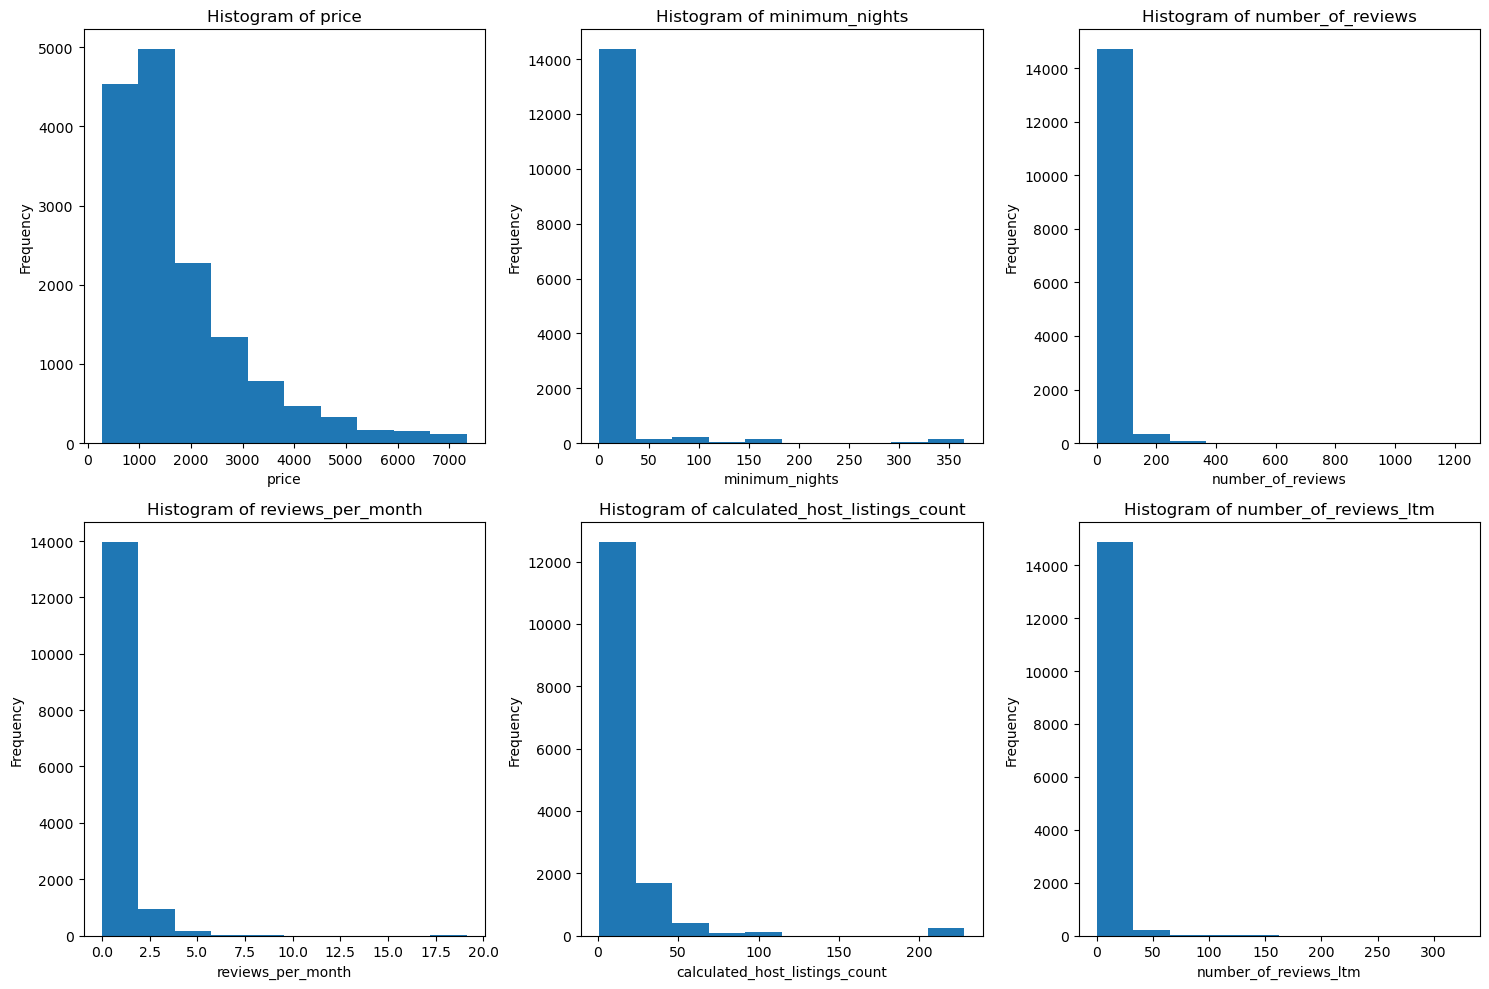

In [61]:
# Select integer-type columns
test_histogram = df_clean_numerik

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_histogram.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot histogram
for idx, column in enumerate(test_histogram.columns):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].hist(test_histogram[column], bins=10)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(len(test_histogram.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


From the histogram above, we can gain some insights:

- All the data are not normally distributed.
- Mostly, the price ranges between 250 and 1800 baht.
- The minimum_night being offered ranges from 1 to 365 nights.
- The number of reviews is mostly between 0 and 100 reviews.
- There is a high chance that most of our hosts have more than one listing.

##### **a. Price variables analysis**

Text(0.5, 0, 'Price in Baht')

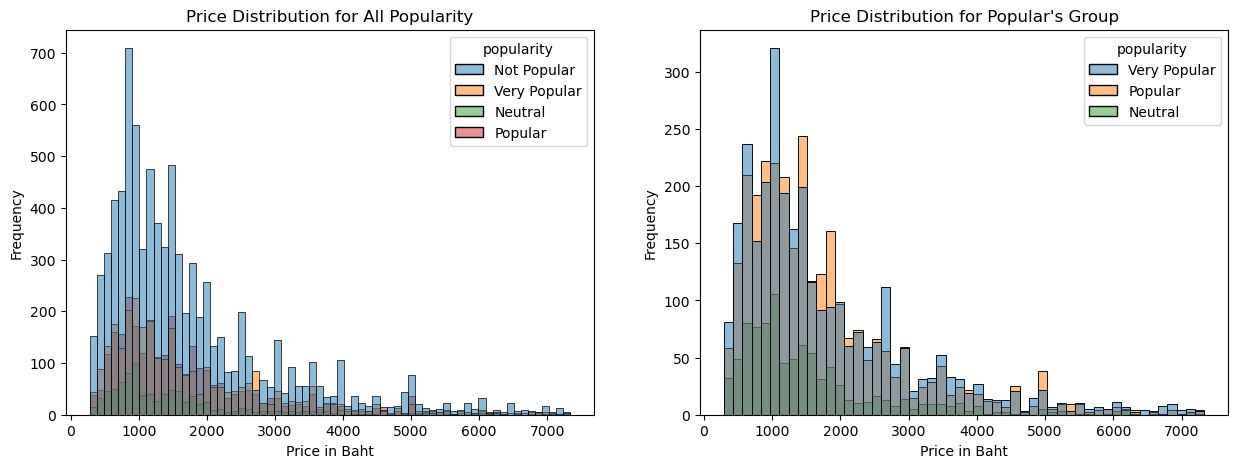

In [62]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='popularity')
plt.title('Price Distribution for All Popularity')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='popularity')
plt.title("Price Distribution for Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

Text(0.5, 0, 'Price in Baht')

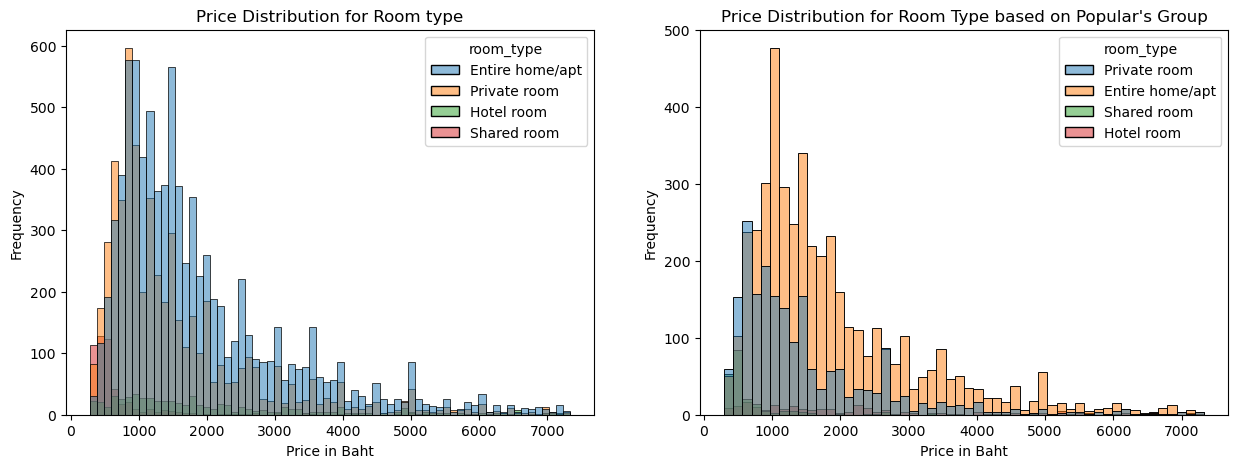

In [63]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='room_type')
plt.title('Price Distribution for Room type')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='room_type')
plt.title("Price Distribution for Room Type based on Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

From the graph above, we can observe the following:

1. Upon comparing the Price Distribution graphs of df_clean and df_popular, Both of them have a similar price range, which is between 500 and 1500 baht. However, if we focus on the highest frequency, the popular group's price is more than 1,000 baht, while the other group's price is under 1,000 baht.
2. Upon analyzing the room types, it becomes clear that listings priced in the range of 750-1800 baht are mostly for entire homes/apartments. Private rooms are priced between 500 and 1200 baht, hotel rooms range from 800 to 1800 baht, and shared rooms range from 278 to 700 baht.
3. Additionally, based on popularity data, it appears that guests highly prefer staying in entire homes or apartments, even if it means paying more expensive, as long as they can access the entire property.

##### **b. Review Analysis**


Text(0.5, 0, 'Number of Reviews')

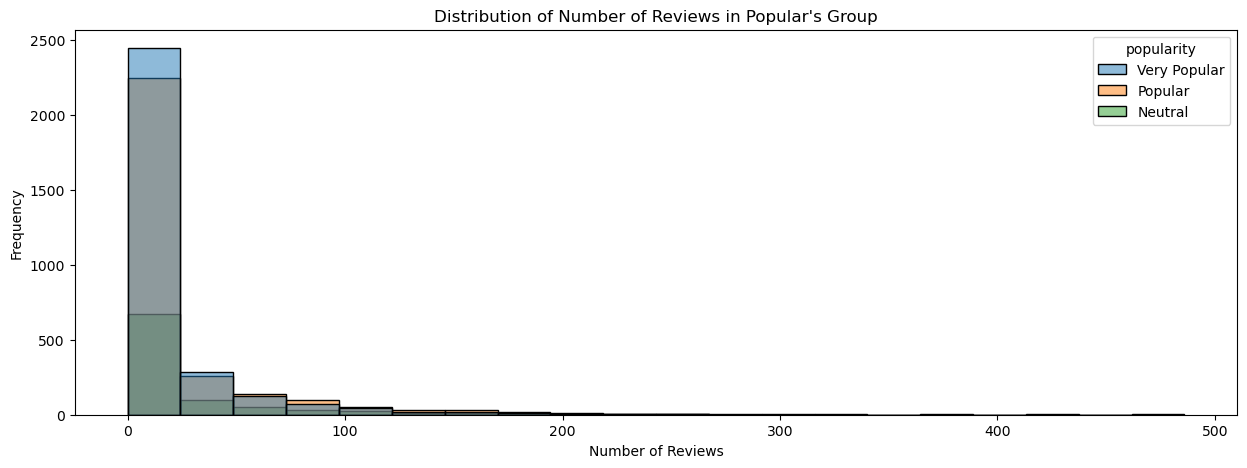

In [64]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_popular,x='number_of_reviews',hue='popularity',bins=20)
plt.title("Distribution of Number of Reviews in Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Number of Reviews')

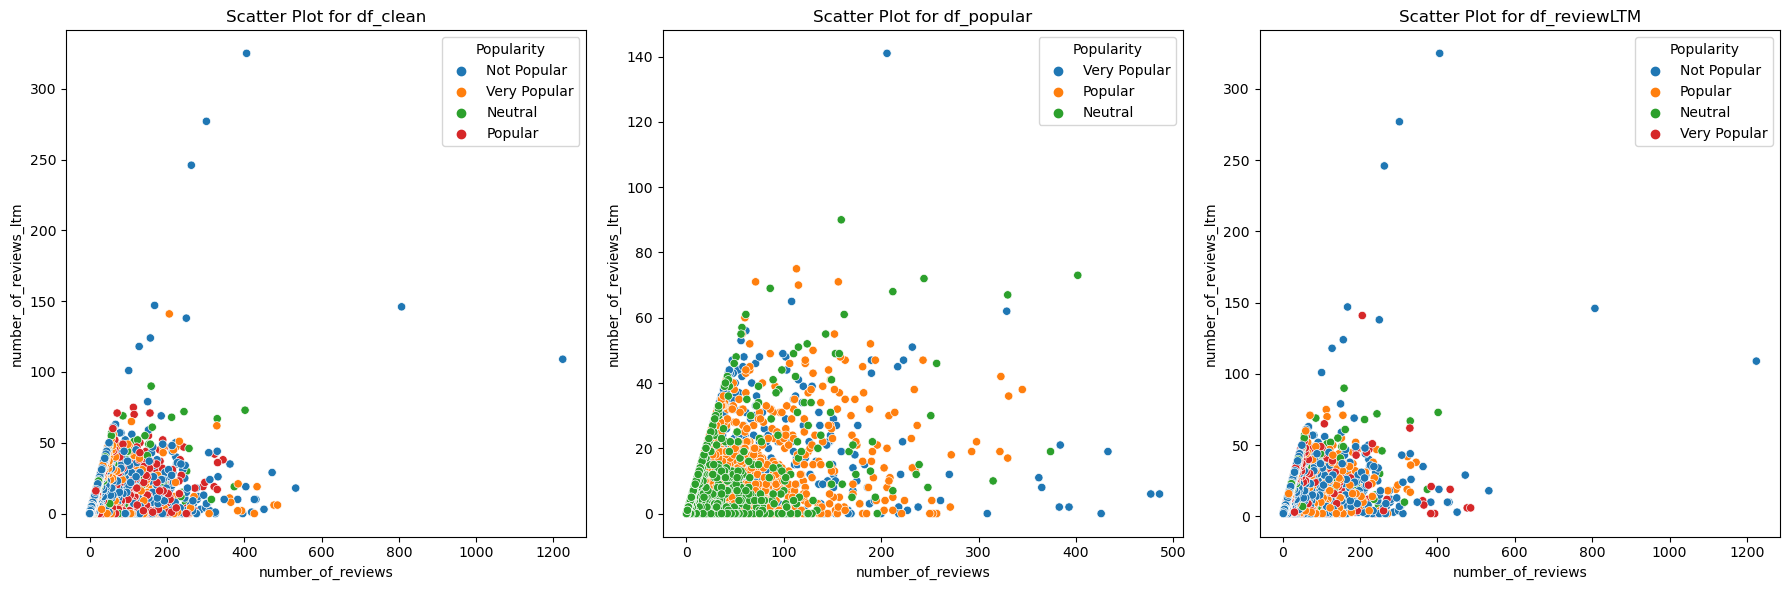

In [65]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for df_clean
sns.scatterplot(data=df_clean, x='number_of_reviews', y='number_of_reviews_ltm', hue='popularity', ax=axes[0])
axes[0].set_title('Scatter Plot for df_clean')
axes[0].legend(title='Popularity', loc='upper right')

# Scatter plot for df_popular
sns.scatterplot(data=df_popular, x='number_of_reviews', y='number_of_reviews_ltm', hue='popularity', ax=axes[1])
axes[1].set_title('Scatter Plot for df_popular')
axes[1].legend(title='Popularity', loc='upper right')

# Scatter plot for df_reviewLTM
sns.scatterplot(data=df_reviewLTM, x='number_of_reviews', y='number_of_reviews_ltm', hue='popularity', ax=axes[2])
axes[2].set_title('Scatter Plot for df_reviewLTM')
axes[2].legend(title='Popularity', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


From the scatterplot, we can see that review has impact to increasing traffic for host.

In [66]:
df_clean['number_of_reviews'].corr(df_clean['reviews_per_month'],method='spearman')

0.8882002933273115

In [67]:
df_clean['number_of_reviews'].corr(df_clean['number_of_reviews_ltm'],method='spearman')

0.7066917354411573

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1365533686.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[0])
C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1365533686.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_popular, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[1])
C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1365533686.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_reviewLTM, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[2])


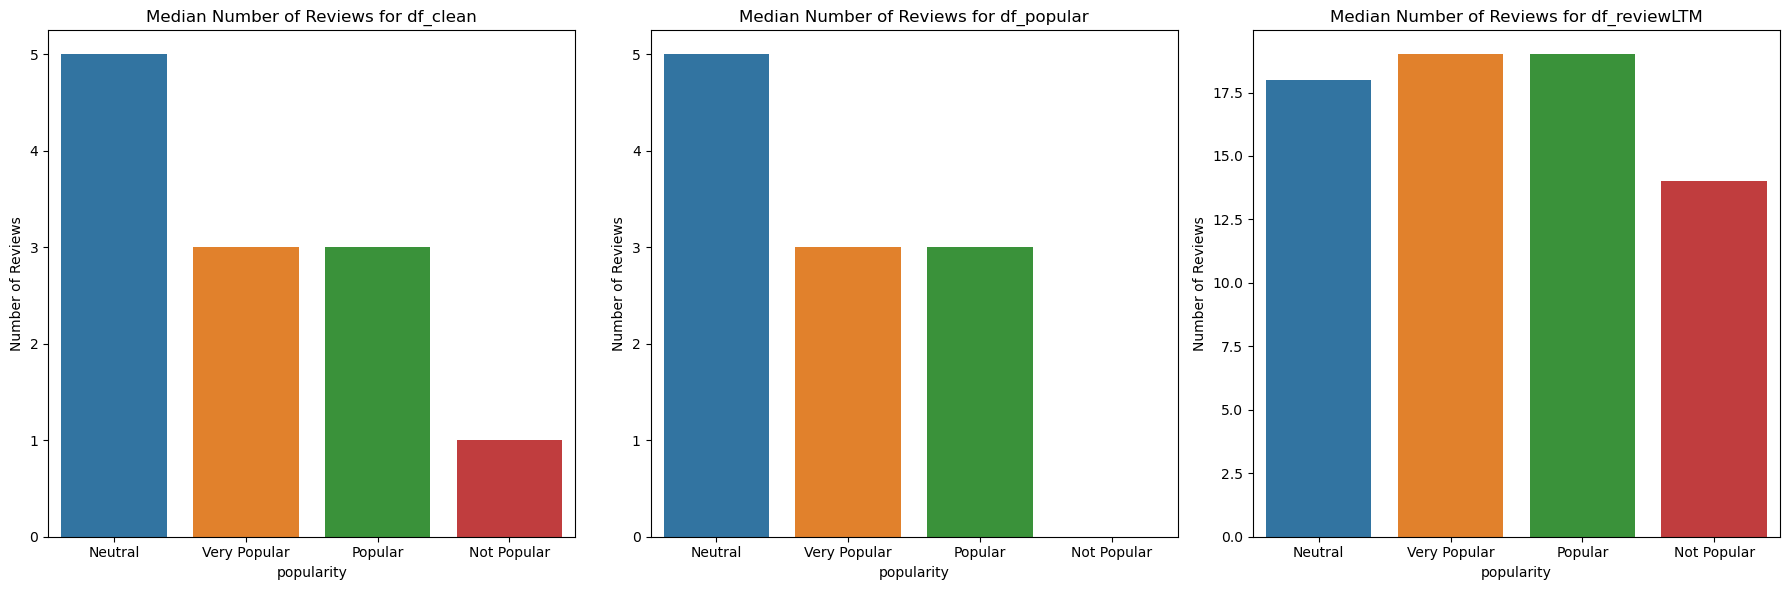

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for df_clean
sns.barplot(data=df_clean, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[0])
axes[0].set_title('Median Number of Reviews for df_clean')
axes[0].set_ylabel('Number of Reviews')

# Bar plot for df_popular
sns.barplot(data=df_popular, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[1])
axes[1].set_title('Median Number of Reviews for df_popular')
axes[1].set_ylabel('Number of Reviews')

# Bar plot for df_reviewLTM
sns.barplot(data=df_reviewLTM, x='popularity', y='number_of_reviews', estimator='median', ci=None, order=['Neutral', 'Very Popular', 'Popular', 'Not Popular'], ax=axes[2])
axes[2].set_title('Median Number of Reviews for df_reviewLTM')
axes[2].set_ylabel('Number of Reviews')

# Show the plot
plt.tight_layout()
plt.show()


From the correlation value, we can conclude that the number of reviews strongly influences popularity. This conclusion is drawn from the reviews_per_month variable, which represents the average number of reviews per month a listing receives over its lifetime. However, this conclusion may be biased because we lack information about when the host started their operation. Therefore, I decided to conduct another correlation test using number_of_reviews_ltm, which represents the number of reviews a host received in the last 12 months. Once again, the correlation values indicate a positive correlation.

Furthermore, the bar plot indicates that listings with more than three reviews experience a notable increase in popularity. Notably, all listings within the 'popular' group have a minimum of three reviews. Moreover, based on the bar plot for df_reviewLTM, it is evident that the majority of listings in this group have more than ten reviews.

In comparing the median of the three dataframes, our belief is becoming more robust: a higher number of reviews tends to enhance visibility.

##### **c. Minimum Nights**

I'd like to know what the demand is for minimum nights. I approached this by dividing the minimum nights into two categories: those under 60 nights and those above 60 nights, as Thailand only grants a 60-day visit visa.

Text(0.5, 1.0, 'Minimum Nights Under 60 nights')

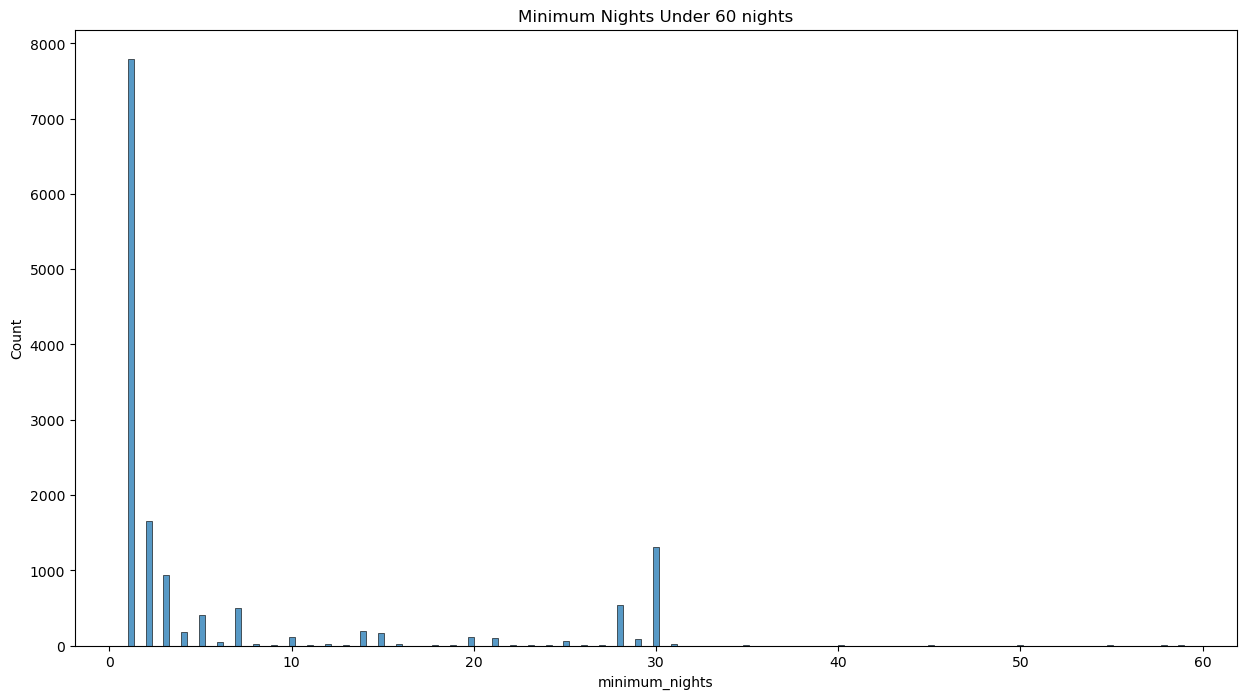

In [69]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_clean[df_clean['minimum_nights']<60], x='minimum_nights')
plt.title('Minimum Nights Under 60 nights')

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\2134787531.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df_popular[df['minimum_nights']>61], x='minimum_nights')


Text(0.5, 1.0, 'Minimum Nights Above 60 nights')

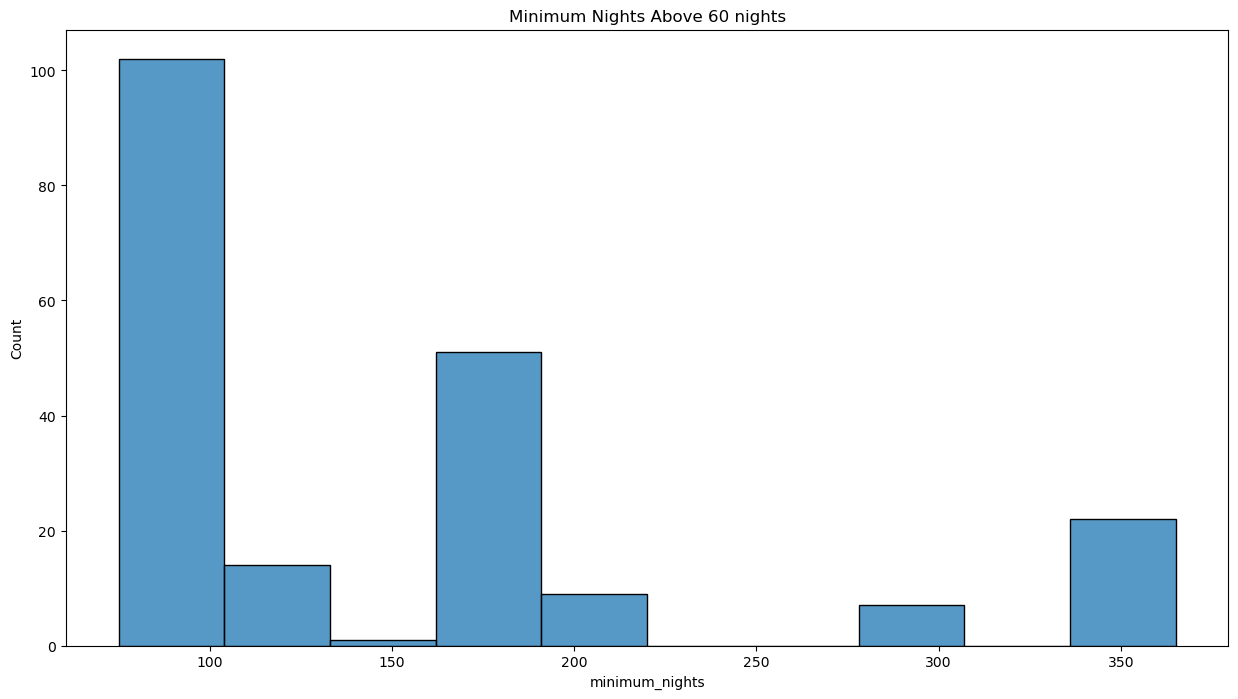

In [70]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_popular[df['minimum_nights']>61], x='minimum_nights')
plt.title('Minimum Nights Above 60 nights')

In [71]:
df_clean[df_clean['minimum_nights']>61]

name    host_name  \
5                         NEw Pro!!  Bungalow Bkk Centre     Wimonpak   
38                    ICONSIAM River view  on 49th floor        Weera   
39                   2br apt in Sukhumvit Asoke near BTS     Kanchuya   
59     Luxury&Comfy wthWifi walk-distance to Subwy-Malls  Mitch & Mam   
60             Apr. for rent full fur 1 bedroom, monthly        Veesa   
...                                                  ...          ...   
15495         Condo - City view - 1 min to BTS Phayathai    Chayanont   
15670                    Spectacular Panorama view condo       Farsai   
15686                           Luxury one bedroom Silom         Yoyo   
15695                        The Aree condo near BTS Ari       Natcha   
15745                      Cozy, lovely and convenient !     Panthira   

       neighbourhood   latitude   longitude        room_type  price  \
5      Bang Kho laen  13.697570  100.528800  Entire home/apt   1000   
38          Bang Rak  13.722870  100.516780     Private room   2500   
39           Vadhana  13.744640  100.557840  Entire home/apt   1732   
59        Chatu Chak  13.809260  100.568920  Entire home/apt    900   
60           Bang Na  13.678050  100.624510     Private room    400   
...              ...        ...         ...              ...    ...   
15495    Ratchathewi  13.755742  100.532794     Private room    704   
15670    Khlong Toei  13.728487  100.565456  Entire home/apt   2076   
15686       Bang Rak  13.727640  100.524220  Entire home/apt   3200   
15695     Phaya Thai  13.781758  100.540628  Entire home/apt   2000   
15745        Vadhana  13.714492  100.592487  Entire home/apt    640   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5                 250                 19  2017-08-03               0.17   
38                180                 15  2015-12-08               0.14   
39                 90                  0  2022-10-21               0.00   
59                358                 56  2019-08-04               0.43   
60                180                  0  2022-10-21               0.00   
...               ...                ...         ...                ...   
15495             180                  0  2022-10-21               0.00   
15670              80                  0  2022-10-21               0.00   
15686             180                  0  2022-12-08               0.00   
15695             180                  0  2020-03-14               0.00   
15745              90                  0  2022-10-21               0.00   

       calculated_host_listings_count  availability_365  \
5                                  41               365   
38                                  1                88   
39                                  1               365   
59                                  1               365   
60                                  1               364   
...                               ...               ...   
15495                               1               365   
15670                               3               173   
15686                              10               365   
15695                               1               363   
15745                               1               282   

       number_of_reviews_ltm    popularity  
5                          0   Not Popular  
38                         0  Very Popular  
39                         0   Not Popular  
59                         0   Not Popular  
60                         0   Not Popular  
...                      ...           ...  
15495                      0   Not Popular  
15670                      0       Popular  
15686                      0   Not Popular  
15695                      0   Not Popular  
15745                      0   Not Popular  

[616 rows x 15 columns]

In [72]:
df_clean[df_clean['minimum_nights']>61].groupby('room_type')[['name']].count().sort_values(by='room_type',ascending=False)

name
room_type            
Shared room         3
Private room      127
Hotel room          1
Entire home/apt   485

In [73]:
df_clean[df_clean['minimum_nights']>61].groupby('neighbourhood')[['name']].count().sort_values(by='name',ascending=False).head(10)

name
neighbourhood      
Khlong Toei      85
Vadhana          67
Huai Khwang      45
Bang Na          44
Ratchathewi      40
Phra Khanong     36
Chatu Chak       29
Sathon           28
Khlong San       26
Bang Rak         26

We can observe from this graph that the majority of guests stay for around 1-3 nights. Additionally, there appears to be demand for stays exceeding 25 nights.

Regarding stays above 60 nights, there is also evident demand. From our perspective, this may occur due to business opportunities, as indicated by the room types, which are predominantly entire homes/apartments and private rooms. Furthermore, most of these listings are clustered around Khlong Toei, Vadhana, and Huai Khwang. These areas are recognized as business districts in Bangkok, Thailand, known for their commercial activities, office buildings, shopping centers, and various business establishments. Khlong Toei, one of Bangkok's oldest and largest districts, hosts a significant portion of the city's industrial and commercial activities. Vadhana, centrally located, is home to many office buildings, embassies, and upscale residential areas. Huai Khwang is also a bustling area, featuring a blend of commercial and residential properties, including office buildings, shopping malls, and entertainment venues.

In [74]:
print("The median value for df_clean['minimum_nights'] is", df_clean['minimum_nights'].median())
print("The median value for df_popular['minimum_nights'] is", df_popular['minimum_nights'].median())
print("The median value for df_reviewLTM['minimum_nights'] is", df_reviewLTM['minimum_nights'].median())


The median value for df_clean['minimum_nights'] is 1.0
The median value for df_popular['minimum_nights'] is 2.0
The median value for df_reviewLTM['minimum_nights'] is 2.0


### **2.2 ANALYSIS OF PRICE FOR OPTIMUM PROFIT**

Question: <br>
**What is the price range that remains competitive while still yielding the most optimal profit?**

Firstly, the price variable is dependent on various factors. Therefore, I would like to explore any correlations with numeric variables. Alternatively, is the price more closely related to categorical variables?

##### **2.2.1 Correlation Test for all Numeric Variables**

In [75]:
df_numerik = df_clean[['price','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [76]:
df_numerik.corr(method = 'spearman')

price  number_of_reviews  \
price                           1.000000           0.001969   
number_of_reviews               0.001969           1.000000   
reviews_per_month               0.045819           0.888200   
calculated_host_listings_count  0.096727           0.225993   
availability_365               -0.019848          -0.260567   
number_of_reviews_ltm           0.073584           0.706692   

                                reviews_per_month  \
price                                    0.045819   
number_of_reviews                        0.888200   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.290700   
availability_365                        -0.248181   
number_of_reviews_ltm                    0.814672   

                                calculated_host_listings_count  \
price                                                 0.096727   
number_of_reviews                                     0.225993   
reviews_per_month                                     0.290700   
calculated_host_listings_count                        1.000000   
availability_365                                     -0.051152   
number_of_reviews_ltm                                 0.279289   

                                availability_365  number_of_reviews_ltm  
price                                  -0.019848               0.073584  
number_of_reviews                      -0.260567               0.706692  
reviews_per_month                      -0.248181               0.814672  
calculated_host_listings_count         -0.051152               0.279289  
availability_365                        1.000000              -0.212444  
number_of_reviews_ltm                  -0.212444               1.000000

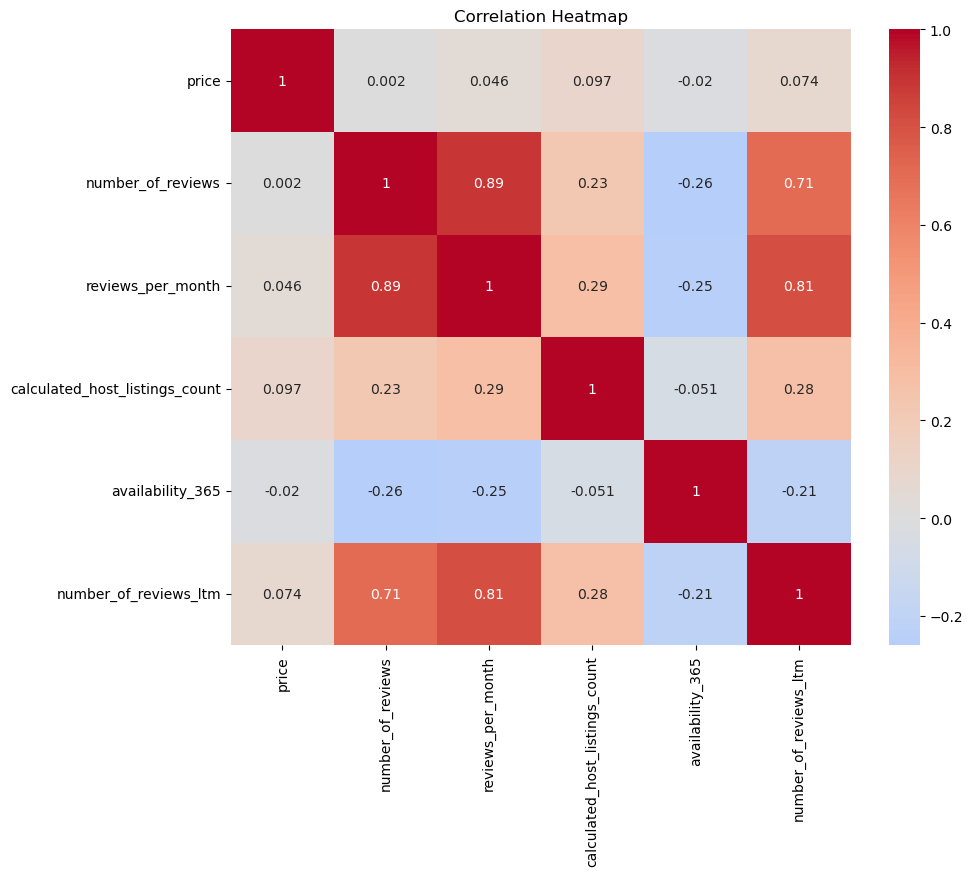

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_numerik.corr(method='spearman'),
            annot=True,   # Show correlation values on the heatmap
            cmap='coolwarm',   # Color map
            center=0)   # Mask to hide values with correlation less than 0.5

plt.title('Correlation Heatmap')
plt.show()

From the heatmap, it can be seen that the variables with relatively strong correlations are:

- Reviews_per_month & number of reviews ltm
- Number_of_reviews with number_of_reviews_ltm
- Reviews_per_month with number_of_review
- Price does not have a very strong correlation with other numeric variables. Therefore, I did not delve deeper into it.

For all the review variables and it correlation , this is easily understandable considering the interrelated nature of the variables.
- Number of reviews refers to the total number of reviews received by the host since the beginning of operations up to the time this data was collected.
- Number of reviews ltm indicates the total number of reviews received in the last 12 months.
- Reviews per month is calculated by dividing the total number of reviews by the total number of operational months.


##### **2.2..2 Price vs Categorical Variable**

In [78]:
df_clean

name   host_name  \
0                        Nice room with superb city view      Nuttee   
1                         Easy going landlord,easy place         Emy   
2                      modern-style apartment in Bangkok  Familyroom   
3         Spacious one bedroom at The Kris Condo Bldg. 3     Sirilak   
4                             Suite Room 3 at MetroPoint       Kasem   
...                                                  ...         ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街       Renee   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   Phakhamon   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   Phakhamon   

      neighbourhood   latitude   longitude        room_type  price  \
0       Ratchathewi  13.759830  100.541340  Entire home/apt   1905   
1           Bang Na  13.668180  100.616740     Private room   1316   
2         Bang Kapi  13.752320  100.624020     Private room    800   
3         Din Daeng  13.788230  100.572560     Private room   1286   
4         Bang Kapi  13.768720  100.633380     Private room   1905   
...             ...        ...         ...              ...    ...   
15849       Pra Wet  13.715132  100.653458     Private room   2298   
15850   Ratchathewi  13.753052  100.538738     Private room   1429   
15851   Ratchathewi  13.753169  100.538700     Private room   1214   
15852   Ratchathewi  13.754789  100.538757     Private room   1214   
15853   Ratchathewi  13.752960  100.540820     Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   3                 65  2020-01-06               0.50   
1                   1                  0  2022-10-21               0.00   
2                  60                  0  2022-10-21               0.00   
3                   7                  2  2022-04-01               0.03   
4                   1                  0  2022-10-21               0.00   
...               ...                ...         ...                ...   
15849              28                  0  2022-10-21               0.00   
15850               1                  0  2022-07-13               0.00   
15851               1                  0  2022-07-13               0.00   
15852               1                  0  2022-07-13               0.00   
15853               1                  0  2022-07-13               0.00   

       calculated_host_listings_count  availability_365  \
0                                   2               353   
1                                   2               358   
2                                   1               365   
3                                   1               323   
4                                   3               365   
...                               ...               ...   
15849                               1               362   
15850                              14               365   
15851                              14               365   
15852                              14               365   
15853                              14               365   

       number_of_reviews_ltm   popularity  
0                          0  Not Popular  
1                          0  Not Popular  
2                          0  Not Popular  
3                          1  Not Popular  
4                          0  Not Popular  
...                      ...          ...  
15849                      0  Not Popular  
15850                      0  Not Popular  
15851                      0  Not Popular  
15852                      0  Not Popular  
15853                      0  Not Popular  

[15141 rows x 15 columns]

**Overall Price Distribution**

Text(0.5, 0, 'Price in Baht')

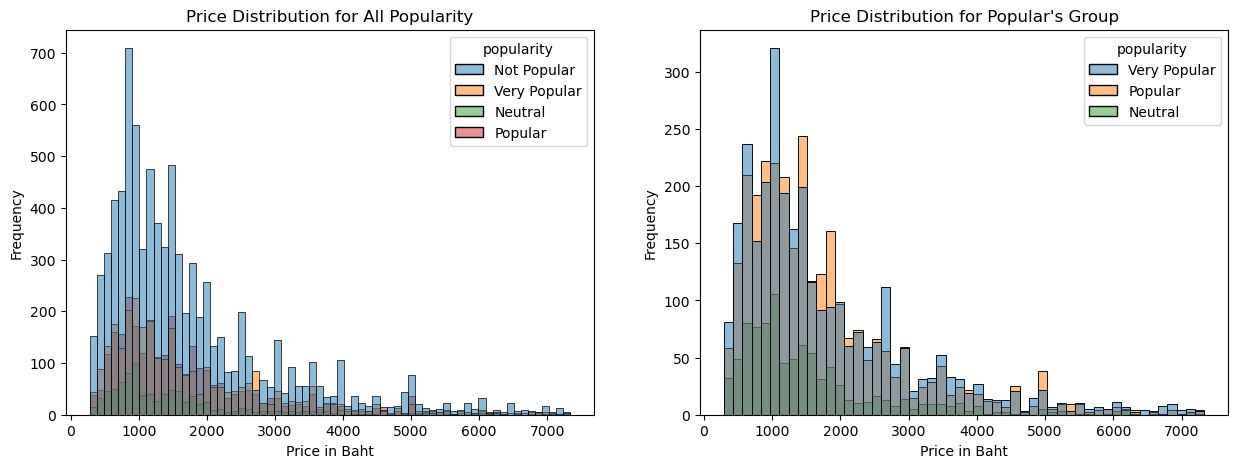

In [79]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='popularity')
plt.title('Price Distribution for All Popularity')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='popularity')
plt.title("Price Distribution for Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

**Price Distribution for each Room Type**

Text(0.5, 0, 'Price in Baht')

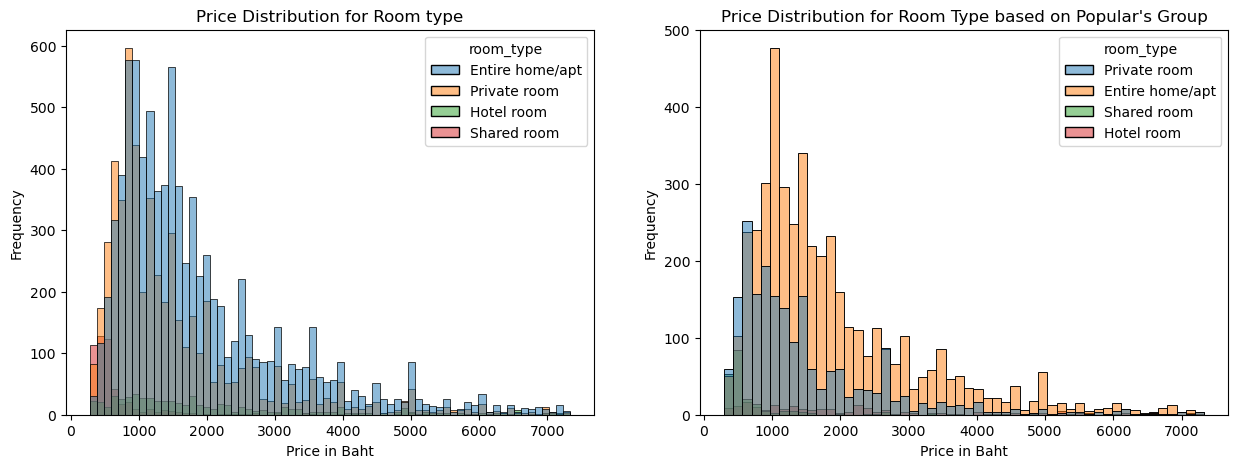

In [80]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='room_type')
plt.title('Price Distribution for Room type')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='room_type')
plt.title("Price Distribution for Room Type based on Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

From the graph above, we can observe the following:

1. Upon comparing the Price Distribution graphs of df_clean and df_popular, it is evident that in df_clean, the majority of listings in the not-popular group fall within the price range of 600-1000 baht. Conversely, in the popular group, listings are predominantly priced between 750-1200 baht.
2. Upon analyzing the room types, it becomes clear that listings priced in the range of 750-1200 baht are mostly for entire homes/apartments. Additionally, based on popularity data, it appears that guests highly prefer staying in entire homes or apartments, even if it means paying an additional price between 800-1800 baht, as long as they can access the entire property.
3. The room type also affects the price. This is evident from the frequency and because entire homes/apartments usually have more than one room.

<function matplotlib.pyplot.legend(*args, **kwargs)>

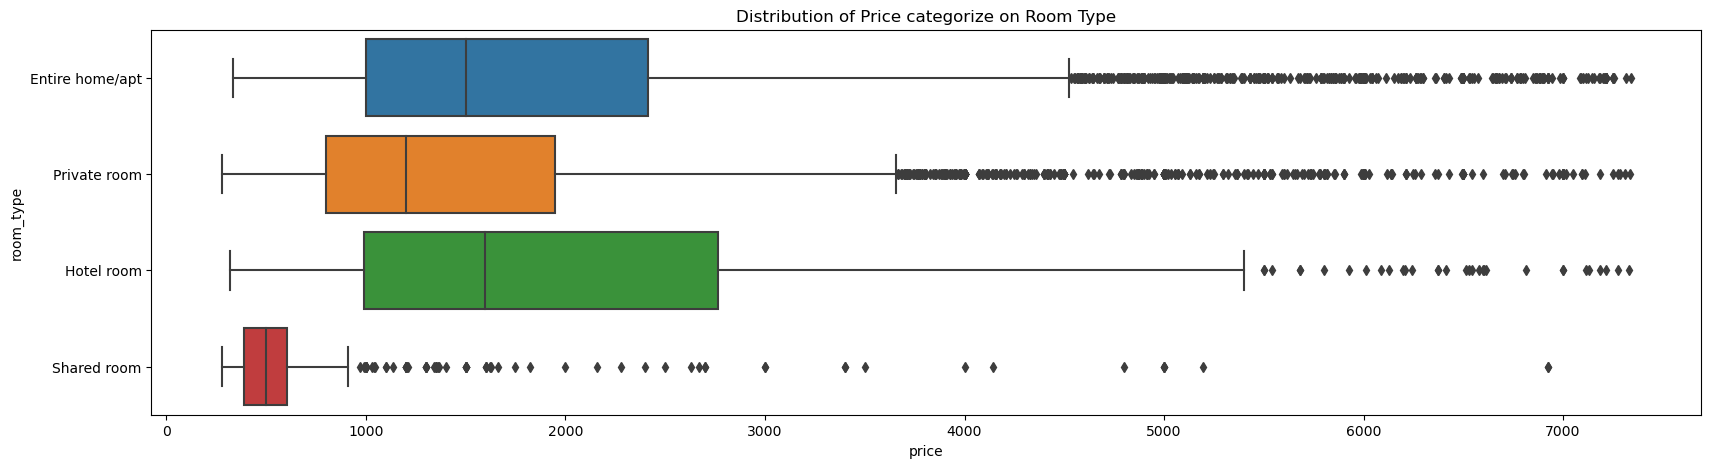

In [81]:

plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend


From the graph above 
1. Hotel rooms have the highest range and upper bound value. This could be due to the brand of the hotel, especially luxury ones.
2. Entire home/apartments have a lot of outliers, which may be attributed to the size of the apartment and its location. This is evident in popular neighborhoods where many data points exceed their upper bounds.
3. The cheapest room type is a shared room.

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1718178402.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='room_type', y='price', ci=0, estimator='median', order=median_prices_clean.index, palette='Blues')
C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1718178402.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_popular, x='room_type', y='price', ci=0, estimator='median', order=median_prices_popular.index, palette='Greens')
C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1718178402.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_reviewLTM, x='room_type', y='price', ci=0, estimator='median', order=median_prices_review_ltm.index, palette='Oranges')


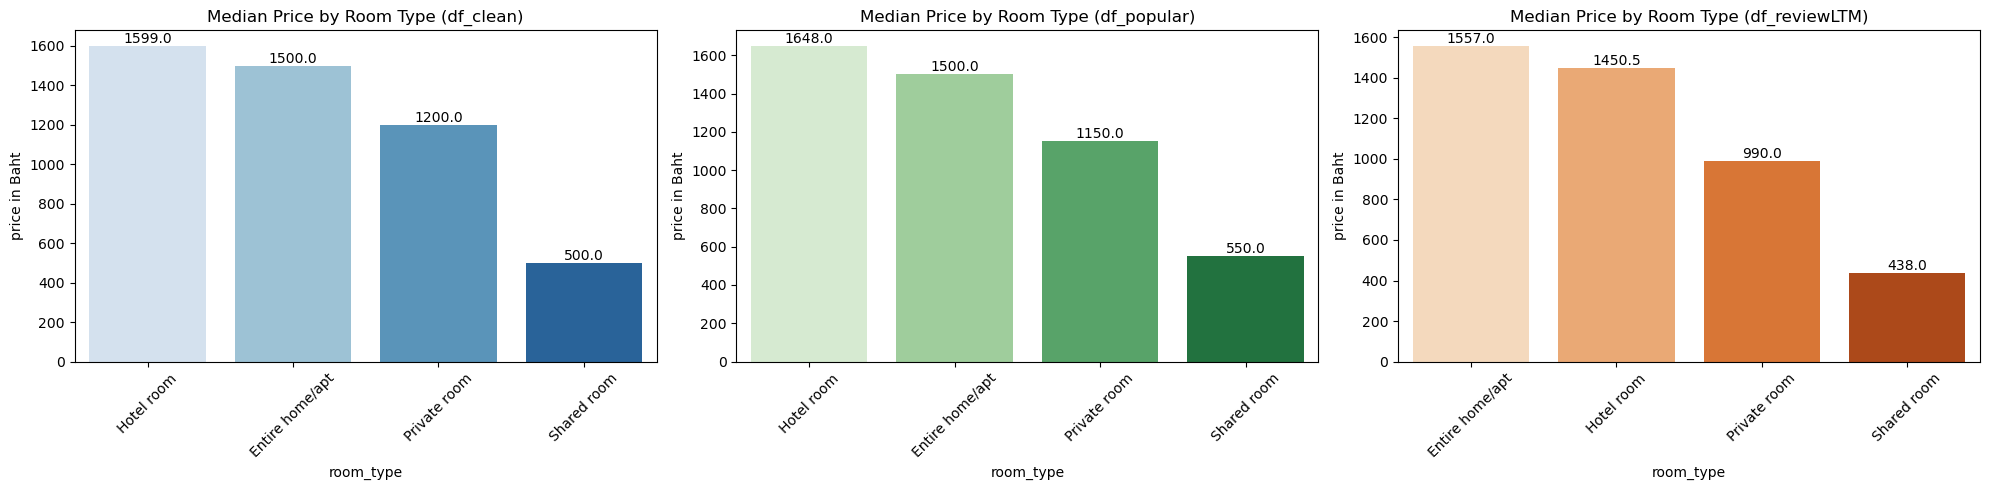

In [82]:
plt.figure(figsize=(20, 5))

# Calculate median price for each room type in df_clean
plt.subplot(1, 3, 1)
median_prices_clean = df_clean.groupby('room_type')['price'].median().sort_values(ascending=False)
sns.barplot(data=df_clean, x='room_type', y='price', ci=0, estimator='median', order=median_prices_clean.index, palette='Blues')
plt.title('Median Price by Room Type (df_clean)')
plt.xticks(rotation=45)
plt.ylabel('price in Baht')
# Add numerical values on bars
for i, v in enumerate(median_prices_clean):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Calculate median price for each room type in df_popular
plt.subplot(1, 3, 2)
median_prices_popular = df_popular.groupby('room_type')['price'].median().sort_values(ascending=False)
sns.barplot(data=df_popular, x='room_type', y='price', ci=0, estimator='median', order=median_prices_popular.index, palette='Greens')
plt.title('Median Price by Room Type (df_popular)')
plt.xticks(rotation=45)
plt.ylabel('price in Baht')
# Add numerical values on bars
for i, v in enumerate(median_prices_popular):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Calculate median price for each room type in df_reviewLTM
plt.subplot(1, 3, 3)
median_prices_review_ltm = df_reviewLTM.groupby('room_type')['price'].median().sort_values(ascending=False)
sns.barplot(data=df_reviewLTM, x='room_type', y='price', ci=0, estimator='median', order=median_prices_review_ltm.index, palette='Oranges')
plt.title('Median Price by Room Type (df_reviewLTM)')
plt.xticks(rotation=45)
plt.ylabel('price in Baht')
# Add numerical values on bars
for i, v in enumerate(median_prices_review_ltm):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


From the comparison of the three dataframes, we can observe that df_clean and df_popular have similar median prices and are ordered similarly:

1. Hotel room - 1599-1648 baht
2. Entire home/apt - 1500 baht
3. Private room - 1150-1200 baht
4. Shared room - 500 - 550 baht

Meanwhile, for df_reviewLTM, we can see that the median price is slightly lower than the other dataframes, and the order of room types is also different:

1. Entire home/apt - 1557 baht
2. Hotel room - 1450 baht
3. Private room - 990 baht
4. Shared room - 438 baht

From this analysis, we can see that guests really love to book entire homes/apartments instead of hotels. This finding is consistent with what I discovered in this article.

*"For Airbnb fans, having space for a family and pets when traveling was a big reason they remain loyal to short-term rentals over hotels. Nearly 90 percent of Airbnb listings have kitchens, according to Randall, and that along with the immersive experience of “traveling like a local” keeps guests booked."* 
https://www.boston.com/community/readers-say/readers-share-why-they-prefer-hotels-over-airbnb/#:~:text=For%20Airbnb%20fans%2C%20having%20space,a%20local%E2%80%9D%20keeps%20guests%20booked.

Additionally, there's a certain degree of price sensitivity among guests, who prefer cheaper accommodations when listings offer similar packages. Therefore, if there are two options that meet a guest's criteria, they will likely choose the cheaper one.




**Price vs Neighbourhood**

The analysis of price and neighborhood has already been conducted in line 21, along with some additional analysis. In this section, I will provide further conclusions.

C:\Users\Intania\AppData\Local\Temp\ipykernel_2372\1445729248.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)


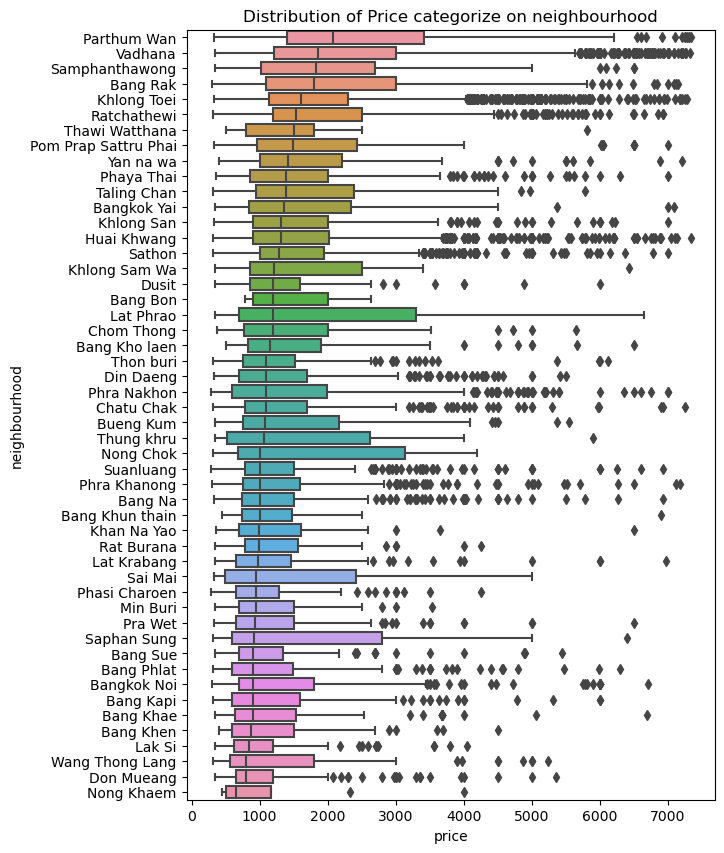

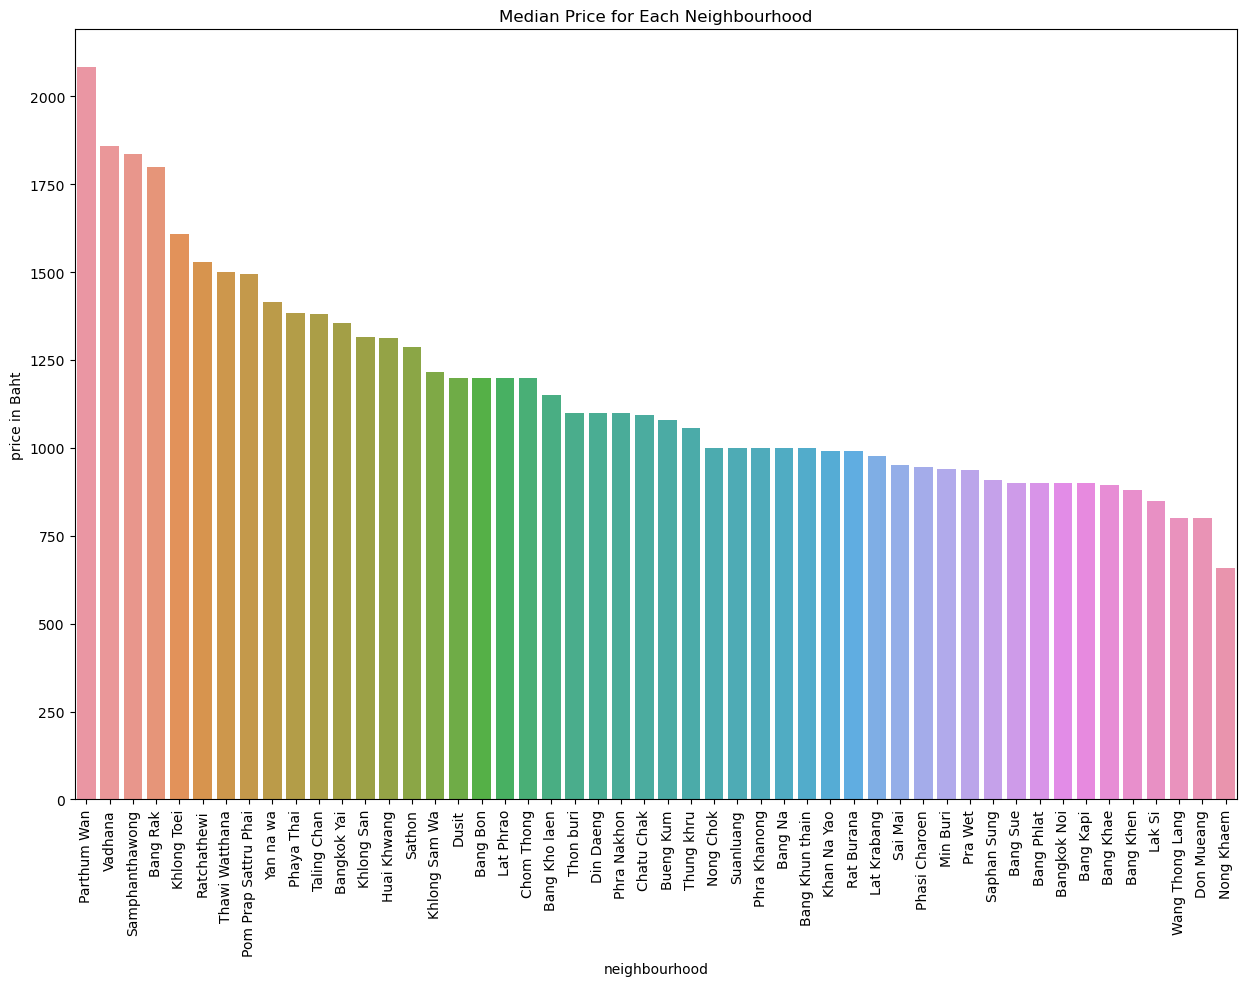

In [83]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
median_prices = df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create boxplot 
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'neighbourhood',
            order=median_prices.index
            )   

# Add title to the graph
plt.title('Distribution of Price categorize on neighbourhood')

# -------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 10))
sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Median Price for Each Neighbourhood')
plt.ylabel('price in Baht')
plt.show()

In [84]:
neighborhood_price_distributions = {}

for name, group in df_clean.groupby('neighbourhood'):
    neighborhood_price_distributions[name] = group['price']

In [85]:
import scipy.stats as stats

# H0  = No neighbourhood has different mean
# Ha = At least one neighborhood has a different mean price. 

f_statistic, p_value = stats.f_oneway(*neighborhood_price_distributions.values())
p_value

if p_value > 0.05:
        print ("Accept H0, there is no enough evidence that minimum one neighbourhood has different mean")
else:
        print ("Reject H0, there is enough evidence that at least one neighbourhood has different mean ")

Reject H0, there is enough evidence that at least one neighbourhood has different mean 


In [86]:
df_clean.groupby('neighbourhood')[['price']].median().sort_values(by='price', ascending=False).head(10)

price
neighbourhood               
Parthum Wan           2083.0
Vadhana               1859.0
Samphanthawong        1835.5
Bang Rak              1800.0
Khlong Toei           1608.0
Ratchathewi           1529.0
Thawi Watthana        1500.0
Pom Prap Sattru Phai  1495.0
Yan na wa             1414.0
Phaya Thai            1385.0

The price varies across different neighborhoods. As shown in the group table above, we can observe that the neighborhood has an impact on the price. The more popular the neighborhood, the more varied its prices, allowing hosts to set higher prices.

# **CONCLUSION**

After conducting thorough analysis, here are the key conclusions drawn and actionable insights:



1. Location plays a significant role in traffic. It's advisable to target areas with high footfall. Expanding business ventures in popular locations, especially those near public transportation, is highly recommended. 

2. Our customers show a strong preference for renting entire houses/apartments and are willing to pay premium prices to match the value offered by hosts.

3. Host reputation is paramount. Being accommodating and responsive is crucial. In times of overwhelm, collaborating with reputable hosts who are open to managing additional properties is a viable option. Also make sure to **ask review** from your guest during check out time. 

4. Recommended price ranges vary by neighborhood and room type. For specific pricing information in your area, please refer to our dashboard by clicking the link below https://public.tableau.com/app/profile/tan.wijaya5955/viz/Intania_capstone_022/Dashboard2?publish=yes :

    - Entire home/apartment: 1000-1800 Baht
    - Private Room: 800-1200 Baht
    - Shared Room: 200-500 Baht
    - Hotel: 800-1500 Baht (Hotels have varying prices based on factors like star rating, brand, etc.)

    Hosts can also focus on their area and find listings with similar qualifications, especially for those with apartments in the same building. Then, they can determine the price range by comparing them. If you want to increase your chances of booking, you can market your listing below the price range by 50-150 baht. Our analysis shows that customers are more likely to choose a cheaper option when presented with similar choices.
    
    Also ensure your reputation and facility because our guest really appreciate it. 
    
5. Review also play important role to boost your visibility and reputation.  As the graph illustrates, having a minimum of three reviews will increase visibility and credibility, because Airbnb algorithm does value the customer's review

6. Since people prefer short staycations lasting 1-2 nights, is it possible to change the minimum nights to 1